In [ ]:
# selenium 라이브러리를 설치합니다.
!pip install selenium
# webdriver-manager 라이브러리 설치
!pip install webdriver-manager

# 필요한 모듈들을 임포트합니다.
import pandas as pd
from IPython import get_ipython
from IPython.display import display
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import time
from collections import Counter
import re
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService  # Service를 올바르게 임포트
import os
from openpyxl import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 25.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Google Chrome 및 ChromeDriver 설치를 위한 명령어들입니다.
!apt-get update
!apt-get install -y google-chrome-stable
!whereis google-chrome
!pip install webdriver-manager

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.5 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,234 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,641 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadcontent.net/

In [ ]:
!pip install requests beautifulsoup4 pandas matplotlib konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 26.9 MB/s eta 0:00:00


In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 124565 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# Import matplotlib and matplotlib.pyplot
import matplotlib
import matplotlib.pyplot as plt

# Configure the font family to 'NanumGothic' and then to 'NanumBarunGothic'
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

- 아기 빨기 문제

'아기 빨기 문제'에 대한 네이버 뉴스 검색 중...
총 58개의 뉴스가 수집되었습니다.
데이터 저장 완료: 아기 빨기 문제.csv
키워드 분석 결과:
아기: 14
임신: 10
금쪽: 8
아이: 7
손가락: 6
당신: 5
일어나고: 5
오은영: 5
건강: 4
육아: 4
발견: 3
모유: 3
주의: 3
눈: 3
좌뇌: 3
주: 3
출산: 3
남매: 3
내: 3
때: 3


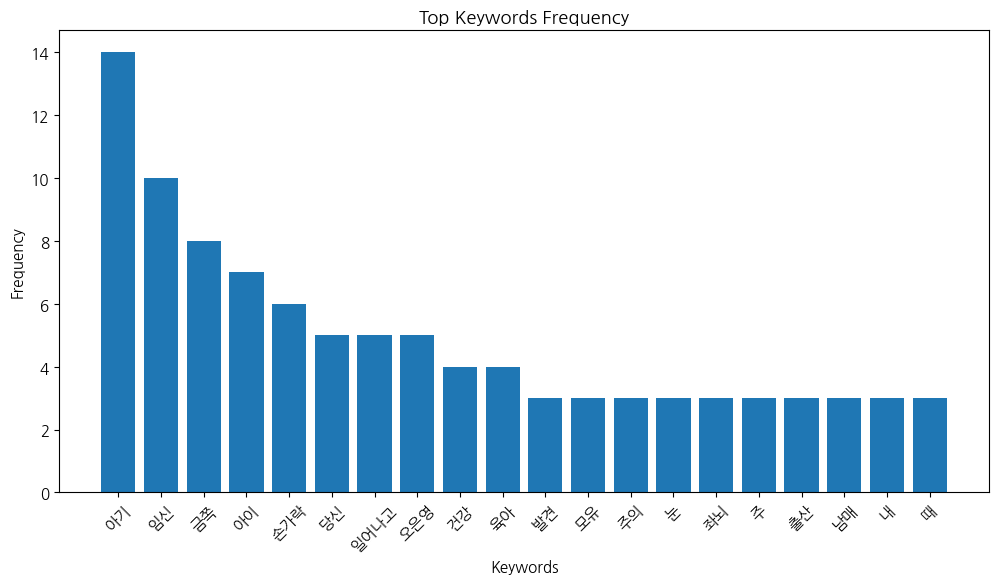

In [ ]:
# 네이버 API 정보
client_id = 'Client id'  # 사용자 Client ID
client_secret = 'Client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (아기 빨기 문제)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "아기 빨기 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('아기 빨기 문제.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 아기 빨기 문제.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 아기 삼킴 문제

'아기 삼킴 문제'에 대한 네이버 뉴스 검색 중...
총 33개의 뉴스가 수집되었습니다.
데이터 저장 완료: 아기 삼킴 문제.csv
키워드 분석 결과:
해외: 13
리콜: 13
국내: 13
유통: 12
제품: 10
중국산: 4
판매: 4
차단: 4
아이: 3
아기: 3
치료: 3
제: 3
병원: 2
한국: 2
연구: 2
건강: 2
의료: 2
차지: 2
건: 2
상품: 2


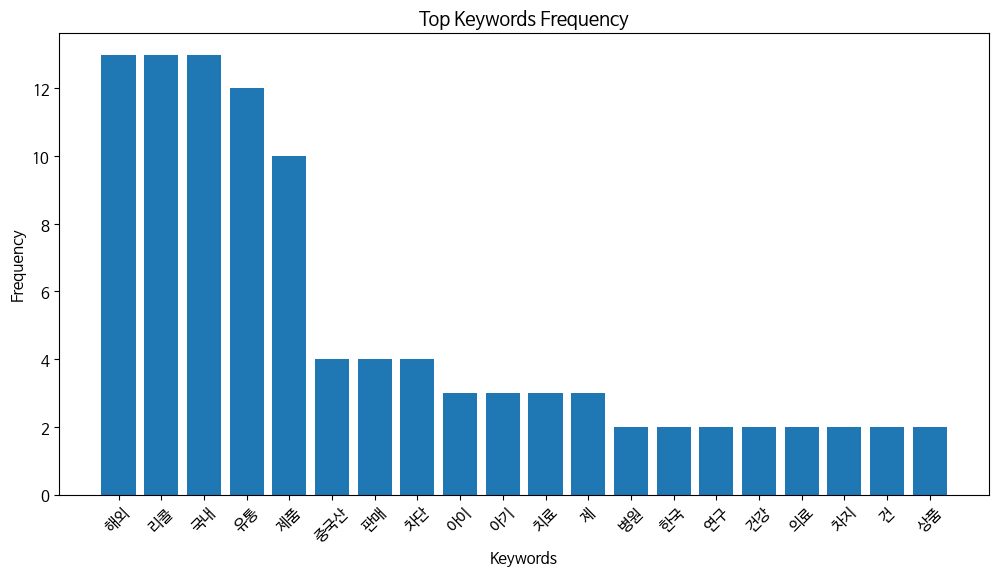

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (아기 삼킴 문제)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "아기 삼킴 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('아기 삼킴 문제.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 아기 삼킴 문제.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 미숙아 연하 곤란

'미숙아 연하 곤란'에 대한 네이버 뉴스 검색 중...
총 5개의 뉴스가 수집되었습니다.
데이터 저장 완료: 미숙아 연하 곤란.csv
키워드 분석 결과:
학회: 2
제약업: 1
소식: 1
병원: 1
석: 1
교수: 1
감염: 1
항균: 1
요법: 1
우수: 1
연제: 1
발달: 1
아이: 1
혹시: 1
뇌성마비: 1
건강: 1
톡톡: 1
사촌: 1
논: 1
사면: 1


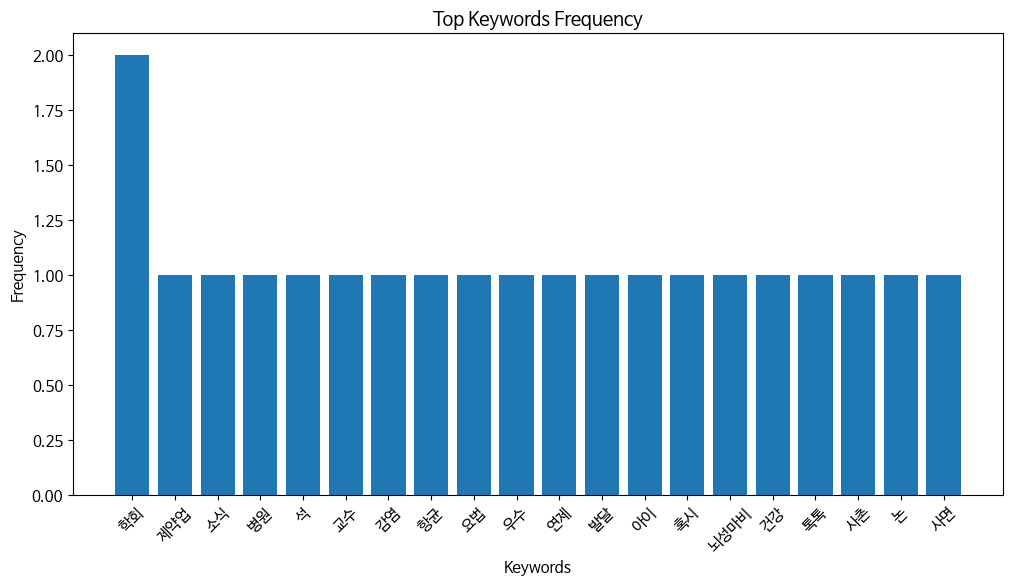

In [ ]:
# 네이버 API 정보
client_id = 'Client id'  # 사용자 Client ID
client_secret = 'Client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (미숙아 연하 곤란)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "미숙아 연하 곤란"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('미숙아 연하 곤란.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 연하 곤란.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 미숙아 모유수유 문제

'미숙아 모유수유 문제'에 대한 네이버 뉴스 검색 중...
총 143개의 뉴스가 수집되었습니다.
데이터 저장 완료: 미숙아 모유수유 문제.csv
키워드 분석 결과:
모유: 22
미숙아: 17
지원: 15
사업: 13
확대: 13
초: 13
위험: 12
아이: 12
출산: 12
분유: 12
수유: 12
건강: 11
출생: 11
광양: 10
아기: 10
약시: 10
병원: 10
대상: 10
광양시: 9
극복: 9


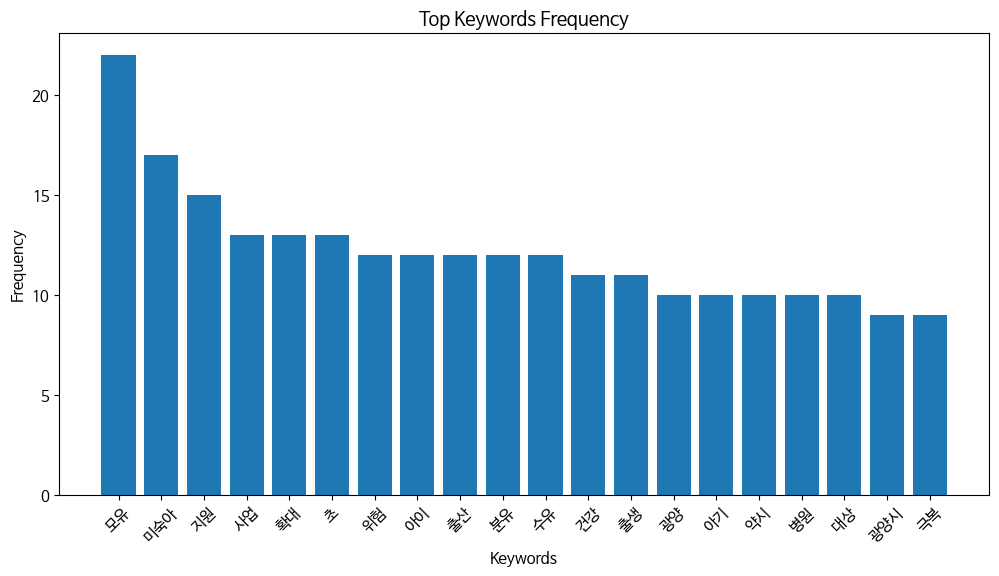

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (미숙아 모유수유 문제)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "미숙아 모유수유 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('미숙아 모유수유 문제.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 모유수유 문제.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 신생아 빨기 문제 원인

'신생아 빨기 문제 원인'에 대한 네이버 뉴스 검색 중...
총 12개의 뉴스가 수집되었습니다.
데이터 저장 완료: 신생아 빨기 문제 원인.csv
키워드 분석 결과:
구순구개열: 4
아기: 3
임신: 2
고양이: 2
건강: 2
신생아: 2
수술: 2
수유: 2
가장: 2
선천성: 2
안면: 2
기형: 2
출생: 2
직후: 2
주의: 1
당신: 1
일어나고: 1
전문가: 1
미각: 1
첫: 1


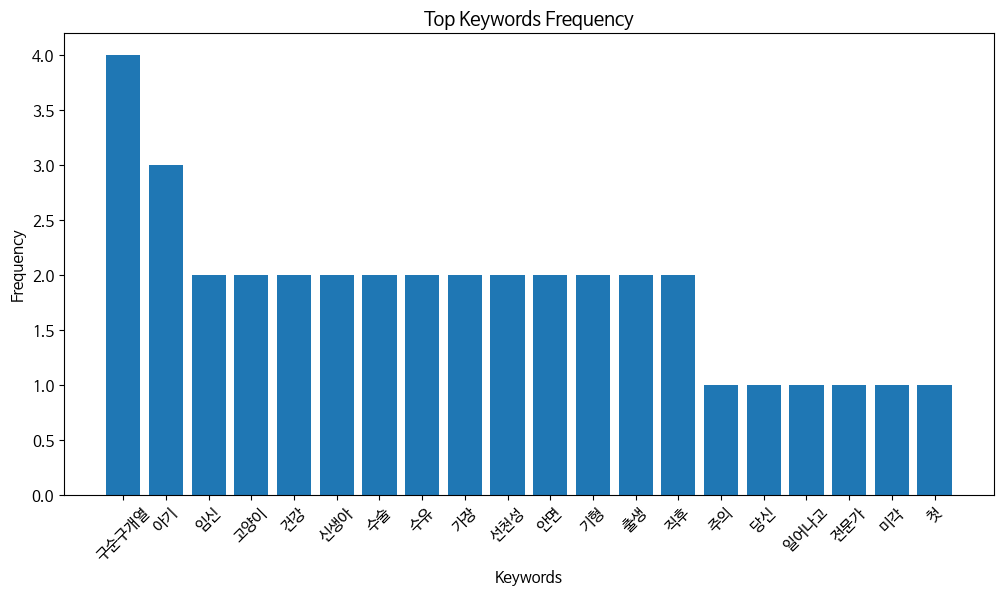

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (신생아 빨기 문제 원인)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "신생아 빨기 문제 원인"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('신생아 빨기 문제 원인.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 신생아 빨기 문제 원인.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 미숙아 수유 어려움

'미숙아 수유 어려움'에 대한 네이버 뉴스 검색 중...
총 119개의 뉴스가 수집되었습니다.
데이터 저장 완료: 미숙아 수유 어려움.csv
키워드 분석 결과:
미숙아: 33
초: 29
병원: 27
모유: 19
출산: 16
엄마: 15
건강: 14
주: 13
미군: 13
둥이: 12
수유: 11
관리: 11
양평군: 11
생명: 11
치료: 11
몽골: 11
기병: 10
중앙대: 10
공모: 9
선정: 9


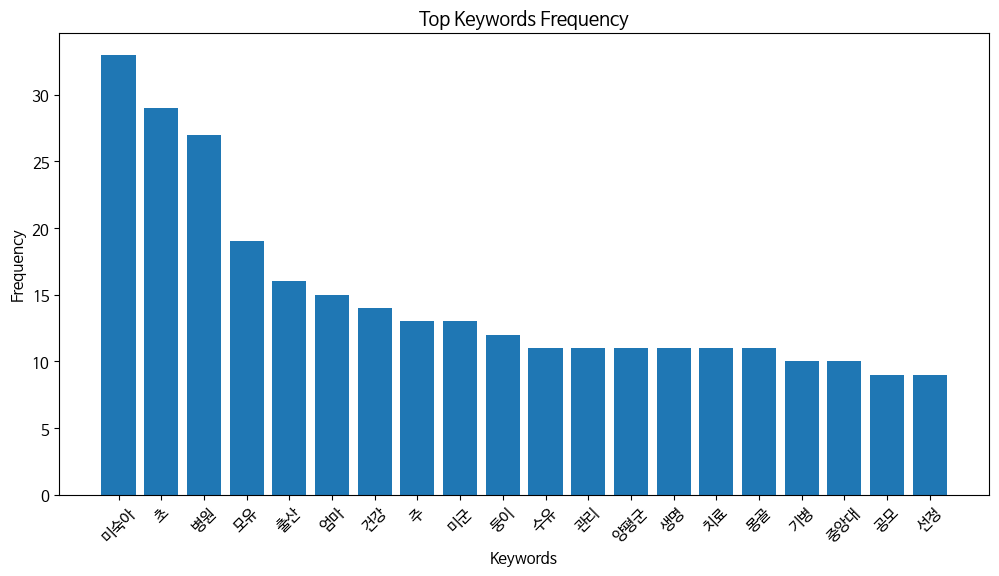

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (미숙아 수유 어려움)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "미숙아 수유 어려움"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('미숙아 수유 어려움.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 수유 어려움.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 아기 빠는 힘

'아기 빠는 힘'에 대한 네이버 뉴스 검색 중...
총 117개의 뉴스가 수집되었습니다.
데이터 저장 완료: 아기 빠는 힘.csv
키워드 분석 결과:
젖병: 23
더블: 18
하트: 18
수유: 15
모유: 13
구순구개열: 13
유한킴벌리: 12
둥이: 10
아기: 10
무상: 10
가슴: 9
제공: 9
나눔: 8
캠페인: 8
모유수유: 8
전용: 7
기적: 7
예찬: 7
엄마: 7
위: 7


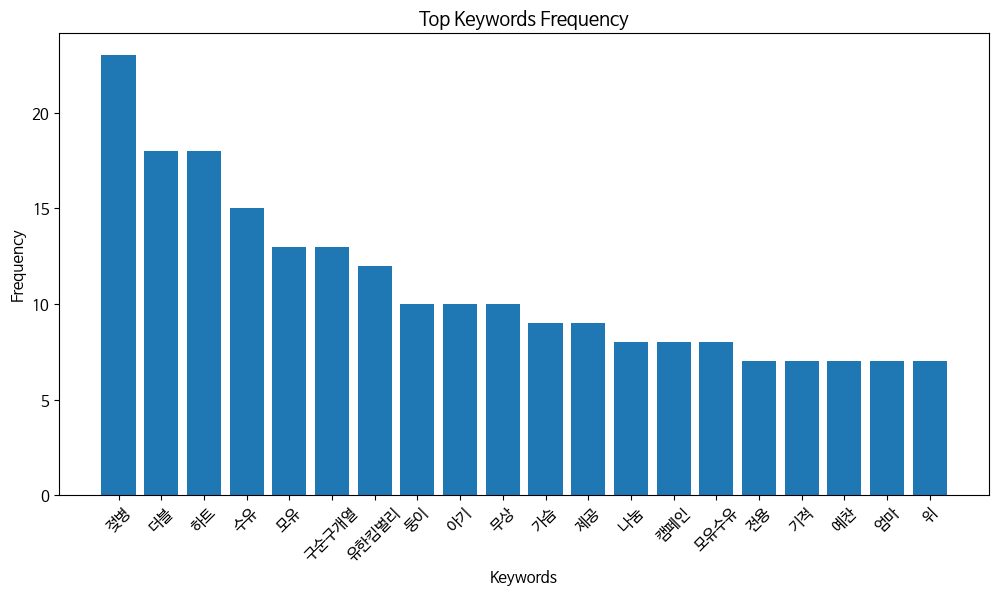

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (아기 빠는 힘)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "아기 빠는 힘"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('아기 빠는 힘.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 아기 빠는 힘.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 신생아 삼킴 문제

'신생아 삼킴 문제'에 대한 네이버 뉴스 검색 중...
총 42개의 뉴스가 수집되었습니다.
데이터 저장 완료: 신생아 삼킴 문제.csv
키워드 분석 결과:
치료: 11
장애: 10
환자: 8
제: 7
병원: 7
중증: 7
합병증: 6
예방: 6
의료: 5
콧줄: 4
에브리: 4
스디: 4
수: 3
칼럼: 3
연하: 3
초기: 3
뇌졸중: 3
언제: 3
지방간: 2
가족: 2


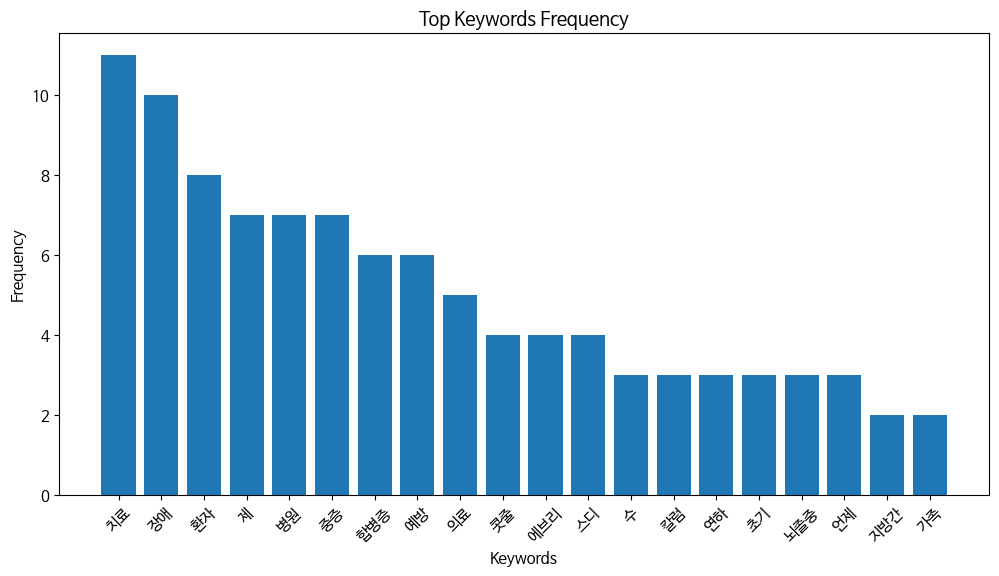

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (신생아 삼킴 문제)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "신생아 삼킴 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('신생아 삼킴 문제.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 신생아 삼킴 문제.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 아기 구강 문제

'아기 구강 문제'에 대한 네이버 뉴스 검색 중...
총 406개의 뉴스가 수집되었습니다.
데이터 저장 완료: 아기 구강 문제.csv
키워드 분석 결과:
건강: 40
아기: 39
아이: 33
치아: 31
센터: 23
임신: 22
병원: 20
생활: 19
퀴즈: 19
정답: 19
코로나: 16
미세: 15
관: 15
접촉: 15
마포구: 15
햇빛: 15
유리: 14
치료: 14
돈버: 14
운영: 14


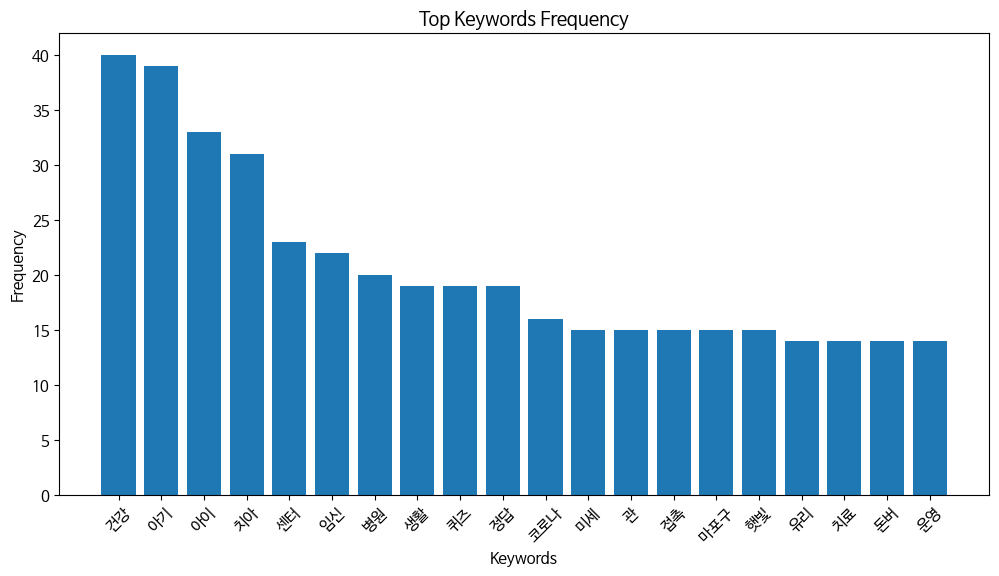

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (아기 구강 문제)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "아기 구강 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('아기 구강 문제.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 아기 구강 문제.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 연하 장애 영아 사례

'연하 장애 영아 사례'에 대한 네이버 뉴스 검색 중...
총 9개의 뉴스가 수집되었습니다.
데이터 저장 완료: 연하 장애 영아 사례.csv
키워드 분석 결과:
소식: 2
병원: 2
후: 2
진단: 2
아동학대: 2
아동: 1
치명: 1
감염병: 1
대규모: 1
재: 1
유행: 1
기후: 1
위기: 1
분쟁: 1
탓: 1
제약업: 1
르포: 1
소아: 1
전문: 1
재활: 1


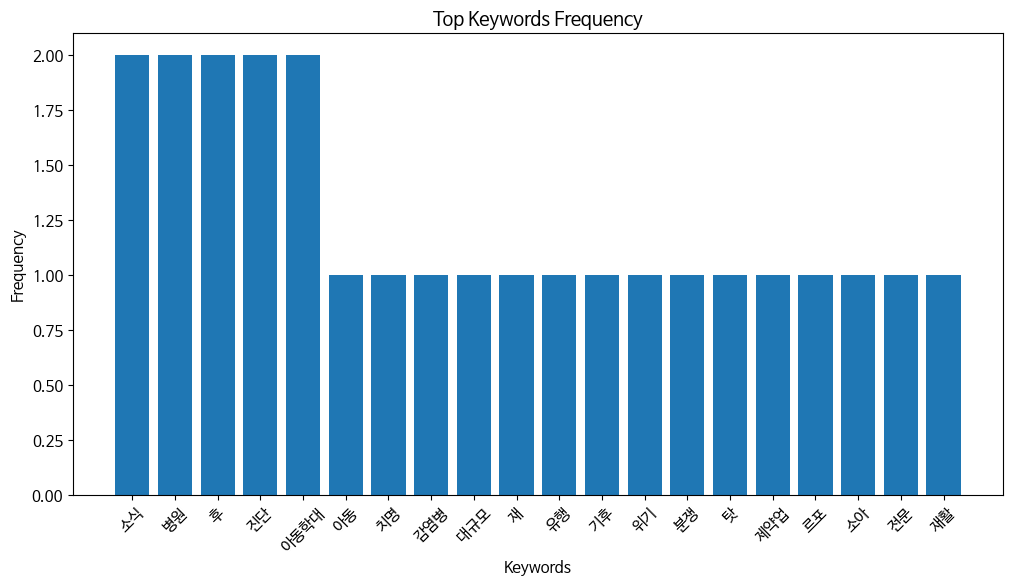

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (연하 장애 영아 사례)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "연하 장애 영아 사례"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('연하 장애 영아 사례.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 연하 장애 영아 사례.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

- 미숙아 삼킴 문제

'미숙아 삼킴 문제'에 대한 네이버 뉴스 검색 중...
총 10개의 뉴스가 수집되었습니다.
데이터 저장 완료: 미숙아 삼킴 문제.csv
키워드 분석 결과:
치료: 3
제: 3
의료: 3
지방간: 2
우유: 2
못: 2
미숙: 2
이화: 2
올릭스: 1
비만: 1
상: 1
중간: 1
데이터: 1
확인: 1
세브란스병원: 1
간문맥: 1
간겨: 1
환자: 1
간이: 1
성공: 1


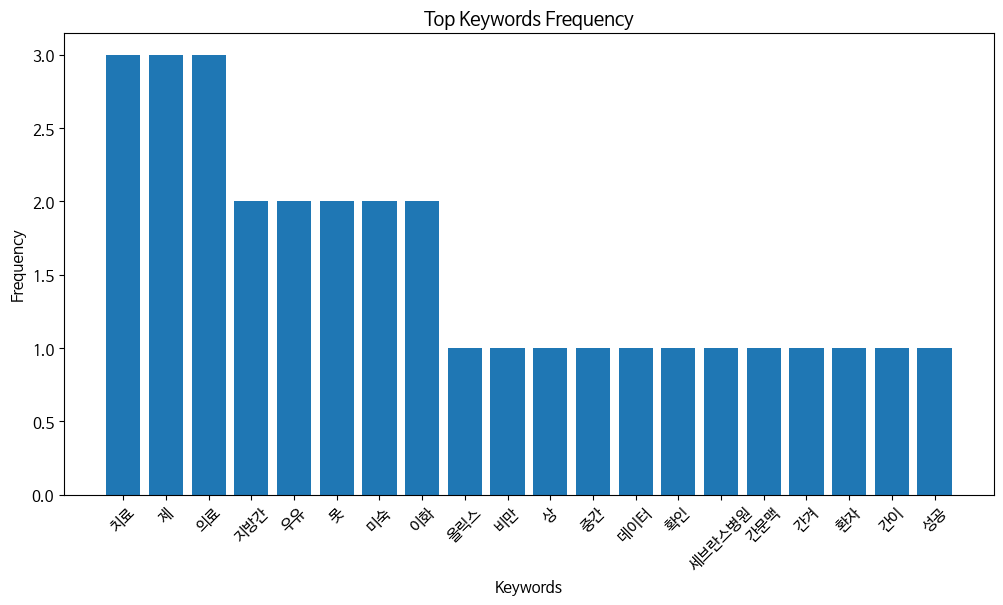

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (연하 장애 영아 사례)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "미숙아 삼킴 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('미숙아 삼킴 문제.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 삼킴 문제.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

 - 미숙아 빨기 문제

'미숙아 빨기 문제'에 대한 네이버 뉴스 검색 중...
총 5개의 뉴스가 수집되었습니다.
데이터 저장 완료: 미숙아 빨기 문제.csv
키워드 분석 결과:
아기: 2
입양: 2
우리: 1
모유: 1
분유: 1
임신: 1
주의: 1
당신: 1
일어나고: 1
해외: 1
돈: 1
갈망: 1
진실: 1
우유: 1
음식: 1
못: 1
아이: 1
모유수유: 1
넌: 1
왜: 1


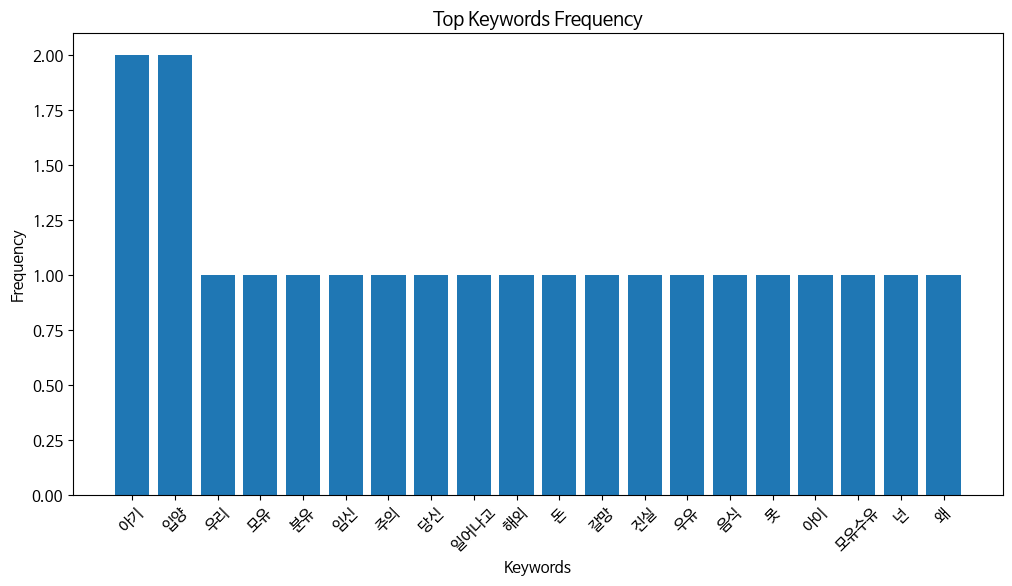

In [ ]:
# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 1. 네이버 뉴스 크롤링 함수 (연하 장애 영아 사례)
def naver_news_crawler(keyword, start_date, end_date, max_display=100, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/news.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()
            for item in data.get('items', []):
                pub_date = datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                if start_date <= pub_date <= end_date:
                    results.append({
                        'title': item['title'],
                        'link': item['link'],
                        'pubDate': pub_date.strftime('%Y-%m-%d'),
                        'description': item['description']
                    })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 2. 키워드 분석 함수
def analyze_keywords(news_data, top_n=20):
    okt = Okt()
    all_words = []

    for news in news_data:
        tokens = okt.nouns(news['title'])  # 제목에서 명사 추출
        all_words.extend(tokens)

    counter = Counter(all_words)
    return counter.most_common(top_n)

# 3. 데이터 시각화 함수
def visualize_keywords(keyword_counts):
    words, counts = zip(*keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Keywords Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.xticks(rotation=45)
    plt.show()

# 실행
if __name__ == "__main__":
    keyword = "미숙아 빨기 문제"
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 1, 6)

    print(f"'{keyword}'에 대한 네이버 뉴스 검색 중...")
    news_data = naver_news_crawler(keyword, start_date, end_date)
    print(f"총 {len(news_data)}개의 뉴스가 수집되었습니다.")

    # 데이터프레임으로 저장
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('미숙아 빨기 문제.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 빨기 문제.csv")

    # 키워드 분석
    keyword_counts = analyze_keywords(news_data)
    print("키워드 분석 결과:")
    for word, count in keyword_counts:
        print(f"{word}: {count}")

    # 키워드 시각화
    visualize_keywords(keyword_counts)

# 전처리 단계

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

- 10가지 크롤링된 csv 파일 각각 전처리

1. 아기 삼킴 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/아기 삼킴 문제.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_아기 삼킴 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                     title  \
0     중앙대병원 강기운 교수, 과기부 한국연구재단 중견연구과제 선정 外   
1  [박인출의 구강 건강이 전신 건강] 모유 수유가 전두엽 발달을 촉진한다   
2            너무 늦어도 안 된다던데…이유식은 언제부터? [식탐]   
3         [메디피플 365] 최적의 영양 공급 통해 의료 질 높인다   
4         해외 리콜 제품, 국내 온라인서 유통… 중국산 63% 차지   

                                                link     pubDate  \
0  http://www.newsmp.com/news/articleView.html?id...  2024-11-01   
1  https://n.news.naver.com/mnews/article/023/000...  2024-06-19   
2  https://n.news.naver.com/mnews/article/016/000...  2024-06-17   
3  https://n.news.naver.com/mnews/article/296/000...  2024-03-22   
4  https://www.newscj.com/news/articleView.html?i...  2024-03-10   

                                         description  
0  영양<b>문제</b> 관련 주의사항과 연하곤란(<b>삼킴</b>장애) 식이요법 등을...  
1  첫째, <b>아기</b>는 엄마 젖꼭지를 빨고 압력을 가함으로써 진공상태로 만들어서...  
2  이유식의 시기와 방법은 <b>아기</b>의 신체·두뇌발달에 영향을 미치지만, 초보 ...  
3  &quot; ―영양불량은 무슨 <b>문제</b>를 초래하나요. &quot;병원 입원...  
4  부품탈락, <b>삼킴</b> 및 질식 위험으로 인한

2. 아기 빨기 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/아기 빨기 문제.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_아기 빨기 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                               title  \
0                울음소리 작고 젖 못 빠는 <b>아기</b>, 설마 희귀근육병?   
1                               [단편소설 은상] 이경희 '최종호흡'   
2  “아직 2살인데”...며칠간 구토하던 <b>아기</b> 뇌에서 ‘이것’ 발견, 무슨...   
3                             [달구벌아침] 가혹한 형벌, 집단 따돌림   
4                     우리 <b>아기</b> 모유가 좋을까? 분유가 좋을까?   

                                                link     pubDate  \
0  https://www.econovill.com/news/articleView.htm...  2024-12-24   
1  https://www.kyongbuk.co.kr/news/articleView.ht...  2024-11-25   
2  https://n.news.naver.com/mnews/article/296/000...  2024-11-15   
3  https://www.idaegu.co.kr/news/articleView.html...  2024-10-16   
4  https://www.sciencetimes.co.kr/news/%ec%9a%b0%...  2024-07-04   

                                         description  
0  <b>아기</b>가 치료를 받지 않으면 평생 못 걷거나 심하면 숨질 수 있어 각별한...  
1  「일본 오염수 아무 <b>문제</b> 없다.」 동네음식점이 몰려있는 거리에 홍보를 ...  
2  2살배기 <b>아기</b>가 며칠간 구토를 하더니 뇌졸중에 걸린 사연이 공개됐다. ...  
3  다음으로 '<b>빨기</b> 본능'은 생존

3. 신생아 빨기 문제 원인

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/신생아 빨기 문제 원인.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_신생아 빨기 문제 원인.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                               title  \
0                 임신 21~24주의 당신과 아기, 어떤 일이 일어나고 있을까?   
1                              고양이 전문가가 알려주는 고양이의 미각   
2  [100세건강] <b>신생아</b> 500분의 1 '구순구개열'…&quot;첫 봉합...   
3      &quot;밥 먹이는 게 힘들 줄은&quot;…수유 트라우마 극복기[하이, 육아]   
4             가장 흔한 선천성 안면 기형 ‘구순구개열’, 출생 직후 결함 교정해야   

                                                link     pubDate  \
0  https://www.sciencetimes.co.kr/news/%ec%9e%84%...  2024-01-04   
1  https://www.dailyvet.co.kr/news/companion-anim...  2023-12-28   
2  https://n.news.naver.com/mnews/article/421/000...  2023-11-05   
3  https://n.news.naver.com/mnews/article/018/000...  2023-10-28   
4  https://n.news.naver.com/mnews/article/469/000...  2022-03-12   

                                         description  
0  주로 <b>빨기</b>, 호흡 등 필수적인 기술을 발달시키고 있는데, 이를 통해서 ...  
1  고양잇과 동물은 유전적인 <b>원인</b>으로 단맛 수용체를 형성하는 단백질을 생산...  
2  국내 <b>신생아</b> 500명 중 1명꼴로 나타나고 선천성 태아 안면 기형으로는...  
3  젖병 거부의 <b>원인</b>으로 △먹이기

4. 미숙아 연하 곤란

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/미숙아 연하 곤란.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 연하 곤란.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                        title  \
0                            [제약업계 소식] 12월 4일   
1      서울성모병원 이래석 교수, 대한감염학회ㆍ대한항균요법학회 우수연제...   
2                발달 느린 아이…혹시 '뇌성마비'일까? [건강톡톡]   
3          사촌이 논을 사면 배가 왜 아플까요? 프로바이오틱스 때문이죠!   
4  [건강한 가족] 호흡·소화기 복합 증상 환아, 의료진 팀워크로 맞춤 치...   

                                                link     pubDate  \
0  http://www.doctorstimes.com/news/articleView.h...  2024-12-04   
1  http://www.newsmp.com/news/articleView.html?id...  2024-11-19   
2  https://www.hidoc.co.kr/healthstory/news/C0000...  2023-03-30   
3                    http://www.breaknews.com/826026  2021-08-10   
4  https://n.news.naver.com/mnews/article/025/000...  2021-05-17   

                                         description  
0  또한 '베아셉트액'은 <b>연하곤란</b> 및 노인 환자 등 정제 경구 투여가 어려...  
1  전종인대골화증: <b>연하곤란</b> 수술(순천향대학교 천안병원 안재민)을 발표한다...  
2  따라서 건강하게 태어나는 만삭아보다는 뇌가 덜 발달한 상태로 태어난 <b>미숙아</...  
3  호흡<b>곤란</b>이 유발되거나, 소변이 잘 나오지 않는 등의 증상이 나타난다. ...  
4  소아호흡기알레르기과

5. 미숙아 수유 어려움

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/미숙아 수유 어려움.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 수유 어려움.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                      title  \
0  보건복지부-국립중앙의료원, 시니어의사 인력 매칭 플랫폼 닥터링크 공...   
1                           [병원계소식] 12월 23일   
2                  이대엄마아기병원, 누적 분만 4000건 달성   
3  &quot;이대엄마아기병원, 저출산 시대 희망의 병원으로 도약&quot;   
4               이대엄마아기병원, 개원 이후 분만 4000건 달성   

                                                link     pubDate  \
0  http://www.newsmp.com/news/articleView.html?id...  2025-01-03   
1  http://www.doctorstimes.com/news/articleView.h...  2024-12-23   
2  https://n.news.naver.com/mnews/article/396/000...  2024-11-21   
3                     http://www.whosaeng.com/156704  2024-11-21   
4  http://www.lawissue.co.kr/view.php?ud=20241120...  2024-11-20   

                                         description  
0  주치의이자 신생아중환자실장 소아청소년과 윤영아 교수는 &quot;<b>미숙아</b>...  
1  특히, 조사 과정에서 발생할 수 있는 정보 파악의 <b>어려움</b>을 극복하며 국...  
2  모든 <b>어려움</b>을 이겨내고 이 자리에 있는 아이들과 부모님들이 진정한 영웅...  
3  모든 <b>어려움</b>을 이겨내고 오늘 이 자리에 있는 아이들과 부모님들이 진정한...  
4  모든 <b>어려움</b>을 이겨내고 오늘

6. 미숙아 모유수유 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/미숙아 모유수유 문제.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 모유수유 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                               title  \
0  기침 100일 가는 '백일해'.. &quot;임신부, 백신 접종해야&quot; [닥터M]   
1  &quot;<b>미숙아</b> 성장·발달 위험도에 따른 국가적 추적관리체계 필요&q...   
2        [꼬꼬무 찐리뷰] 3살도 안 된 세 자매의 연이은 사망…보험금 노린 악인...   
3                      광양시 “광양에서 태어난 아이, 광양市가 책임집니다”   
4    광양시 저출산 극복···&quot;광양에서 태어난 아이, 광양시가 책임진다&quot;   

                                                link     pubDate  \
0  https://n.news.naver.com/mnews/article/659/000...  2024-12-21   
1  http://www.monews.co.kr/news/articleView.html?...  2024-09-19   
2  https://m.entertain.naver.com/article/416/0000...  2024-07-19   
3  https://www.cnbnews.com/news/article.html?no=6...  2024-07-16   
4  https://www.thereport.co.kr/news/articleView.h...  2024-07-16   

                                         description  
0  그리고 <b>미숙아</b>가 조금 특별한데요. <b>미숙아</b>는 37주 미만 또...  
1  등에서 <b>문제</b>를 겪을 수 있다고 말했다. 이외에도 운동발달 지연과 뇌성마...  
2  임신 30주 만에 <b>미숙아</b>로 태어난 서연이는 태어나자마자 병원 신세를 져...  
3  <b>모유 수유</b>가 불가능한 경우에는

7. 아기 빠는 힘

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/아기 빠는 힘.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_아기 빠는 힘.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                               title  \
0  &quot;아동학대 비서관 채용...사죄해야&quot;...민주당, 국힘 박상웅 의...   
1           더블하트 '이른둥이 전용 젖병 나눔 캠페인' 2025년에도 계속해서 진행   
2                    더블하트 '이른둥이 전용 젖병 나눔 캠페인' 내년도 진행   
3                           [김도진의 독서노트] 트렌드 코리아 2025   
4               '체중 250g 국내 최소' 1% 생존률 극복한 예랑이의 '기적'   

                                                link     pubDate  \
0  https://n.news.naver.com/mnews/article/031/000...  2024-12-03   
1  https://www.sisamagazine.co.kr/news/articleVie...  2024-11-15   
2  https://n.news.naver.com/mnews/article/025/000...  2024-11-15   
3  http://www.newsian.co.kr/news/articleView.html...  2024-11-14   
4  https://n.news.naver.com/mnews/article/015/000...  2024-11-12   

                                         description  
0  행위', '손가락 <b>빠는</b> 버릇 고친다고 열 손가락에 매운 것을 발라 강제...  
1  더블하트는 세브란스 어린이병원을 비롯한 9개 병원의 NICU(신생아 집중치료실)에도...  
2  더블하트는 세브란스 어린이병원을 비롯한 9개 병원의 NICU(신생아 집중치료실)에도...  
3  무해함의 끝판왕은 <b>아기</b>다. 진

<ipython-input-13-215d5543ef00>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


8. 신생아 삼킴 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/신생아 삼킴 문제.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_신생아 삼킴 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                               title  \
0  [Today Pharm] 올릭스 MASH·비만 치료제, 1상 중간 데이터 확인…&q...   
1                 우파 아버지 간호한 좌파딸... 우리 가족도 '결의' 했습니다   
2                                     [병원계 소식] 7월 9일   
3              [메디컬 인사이트 30회] 가정에서 할 수 있는 '소아 응급 대처'   
4                     세브란스병원, 간문맥 막힌 간겨화 환자 간이식 성공 外   

                                                link     pubDate  \
0  http://www.press9.kr/news/articleView.html?idx...  2024-11-04   
1  https://n.news.naver.com/mnews/article/047/000...  2024-10-06   
2  http://www.doctorstimes.com/news/articleView.h...  2024-07-09   
3  https://n.news.naver.com/mnews/article/052/000...  2024-05-03   
4  http://www.newsmp.com/news/articleView.html?id...  2024-05-02   

                                         description  
0  종근당 관계자는 &quot;CKD-508은 CETP와 강한 결합력을 바탕으로 약물축...  
1  생각은, '이념의 <b>문제</b>가 단지 우리 가족의 <b>문제</b>는 아니구나...  
2  신체·인지·<b>삼킴</b> 장애로 인해 소아재활치료가 필요한 6개월부터 14세까지...  
3  특히 1개월 미만의 <b>신생아</b>는 

9. 아기 구강 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/아기 구강 문제.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_아기 구강 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                               title  \
0  기침 100일 가는 '백일해'.. &quot;임신부, 백신 접종해야&quot; [닥터M]   
1  &quot;5명 중 1명 '생식기 해르페스' 감염... 1초마다 최소 1명씩 전염되...   
2           한의혜민대상, 부산시 이종진 의원ㆍ스포츠한의학회 장세인 회장 공동수...   
3                              치아 건강은 오복… 유치부터 꼼꼼하게!   
4         [달성군보건소] '아이 낳고 키우기 좋은 도시' 임신에서 출산까지 전폭...   

                                                link     pubDate  \
0  https://n.news.naver.com/mnews/article/659/000...  2024-12-21   
1              https://www.insight.co.kr/news/486773  2024-12-13   
2  http://www.newsmp.com/news/articleView.html?id...  2024-12-11   
3                http://www.cmbdj.co.kr/ab-991-28732  2024-12-11   
4  https://www.idaegu.com/news/articleView.html?i...  2024-12-02   

                                         description  
0  [김진규] 호흡기라고 하면 보통 상기도 그리고 하기도로 나눌 수 있는데 상기도는 비...  
1  이 <b>문제</b>는 충분히 논의되지 않았다&quot;고 밝혔다.이어 &quot;...  
2  임신 37주 이전에 분만이 이루어지는 조산은 산모와 <b>아기</b> 모두에게 건강...  
3  성인의 <b>구강</b> 건강은 유<b>아

<ipython-input-15-57289c87d12e>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


10. 연하 장애 영아 사례

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/연하 장애 영아 사례.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_연하 장애 영아 사례.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                       title  \
0            아동에 치명적 3대 감염병 대규모 재유행…기후위기·분쟁탓   
1                           [제약업계 소식] 12월 4일   
2  [르포]“소아 전문 재활병원 찾아 전국 떠돌아…난민생활 끝 기대에 눈...   
3                    GERD 환자, 적정량 식사 후 눕지마세요   
4           클림트의 ‘키스’…의학의 관점에서 해부하다 外 [병원소식]   

                                                link     pubDate  \
0  https://www.goodnews1.com/news/articleView.htm...  2024-12-27   
1  http://www.doctorstimes.com/news/articleView.h...  2024-12-04   
2  https://n.news.naver.com/mnews/article/018/000...  2023-06-12   
3  https://www.kpanews.co.kr/article/show.asp?idx...  2022-01-25   
4   http://www.kukinews.com/newsView/kuk202112220026  2021-12-22   

                                         description  
0  아프리카 콩고민주공화국(민주콩코)에서 엠폭스에 감염된 생후 5개월 <b>영아</b>...  
1  또한 '베아셉트액'은 <b>연하</b>곤란 및 노인 환자 등 정제 경구 투여가 어려...  
2  (사진=대전시 제공) “<b>장애</b>아를 둔 부모 입장에선 그간 경제적으로도, ...  
3  운영하는 <b>사례</b>도 일반화 되고 있습니다. 이에 대한약사저널은 약사의 보다...  
4  대표 <b>사례</b>로 주목

11. 미숙아 삼킴 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/미숙아 삼킴 문제.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 삼킴 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                               title  \
0  [Today Pharm] 올릭스 MASH·비만 치료제, 1상 중간 데이터 확인…&q...   
1                     세브란스병원, 간문맥 막힌 간겨화 환자 간이식 성공 外   
2        우유로 연명하는 4세 아들 “배 속에서도 못 먹어, 40주 넘기고도 미숙...   
3                                      신미숙 여의도 책방-38   
4                         [이BIO] JW생명과학·대웅제약·이화의료원 외   

                                                link     pubDate  \
0  http://www.press9.kr/news/articleView.html?idx...  2024-11-04   
1  http://www.newsmp.com/news/articleView.html?id...  2024-05-02   
2  https://m.entertain.naver.com/article/609/0000...  2024-02-24   
3  https://www.akomnews.com/bbs/board.php?bo_tabl...  2023-03-23   
4  http://www.newsprime.co.kr/news/article.html?n...  2022-12-01   

                                         description  
0  종근당 관계자는 &quot;CKD-508은 CETP와 강한 결합력을 바탕으로 약물축...  
1  출혈, <b>미숙아</b> 기관지폐형성 이상 등 다양한 질환 관련 연구가 활발히 진...  
2  영양 흡수가 <b>문제</b>인 것&quot;이라고 했다. 아이는 현재 우유로 연명...  
3  우측 상하지 운동마비도, <b>삼킴</b>

12. 미숙아 빨기 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/뉴스크롤링/미숙아 빨기 문제.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 빨기 문제.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                             title  \
0                          우리 아기 모유가 좋을까? 분유가 좋을까?   
1               임신 21~24주의 당신과 아기, 어떤 일이 일어나고 있을까?   
2                       [해외입양과 돈]② 입양인들이 갈망하는 '진실'   
3                          우유·음식 못 삼키는 아이, 어떻게 먹일까   
4  &quot;모유수유 좋은데 넌 왜 안 했어? 비난 말고 모자동실부터 늘려야&quot;   

                                                link     pubDate  \
0  https://www.sciencetimes.co.kr/news/%ec%9a%b0%...  2024-07-04   
1  https://www.sciencetimes.co.kr/news/%ec%9e%84%...  2024-01-04   
2  https://n.news.naver.com/mnews/article/607/000...  2023-11-02   
3  http://www.knnews.co.kr/news/articleView.php?i...  2021-08-30   
4  https://www.ibabynews.com/news/articleView.htm...  2021-08-11   

                                         description  
0  아기가 <b>미숙아</b>이거나 출생 후 <b>문제</b>가 있는 경우, 엄마가 바...  
1  주로 <b>빨기</b>, 호흡 등 필수적인 기술을 발달시키고 있는데, 이를 통해서 ...  
2  한국탐사저널리즘센터-뉴스타파는 해외입양 피해자와 수익자, 책임자를 찾고 구조적 <b...  
3  ‘젖<b>빨기</b> 반응’이 관찰된다. 출산이 가까운 태아의 

In [ ]:
print(f"원본 데이터 개수: {len(data)}")

원본 데이터 개수: 104


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 시각화

In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-15-bf8f04852391>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Processing: 전처리된_미숙아 빨기 문제.csv
Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-15-bf8f04852391>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Generating Word Cloud...


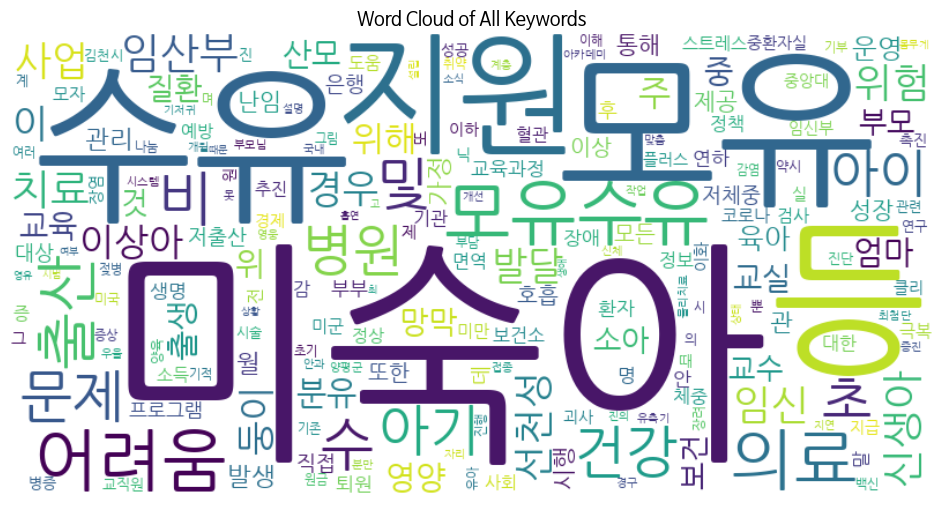

Keyword Correlation Analysis...
Keyword Trend Analysis...


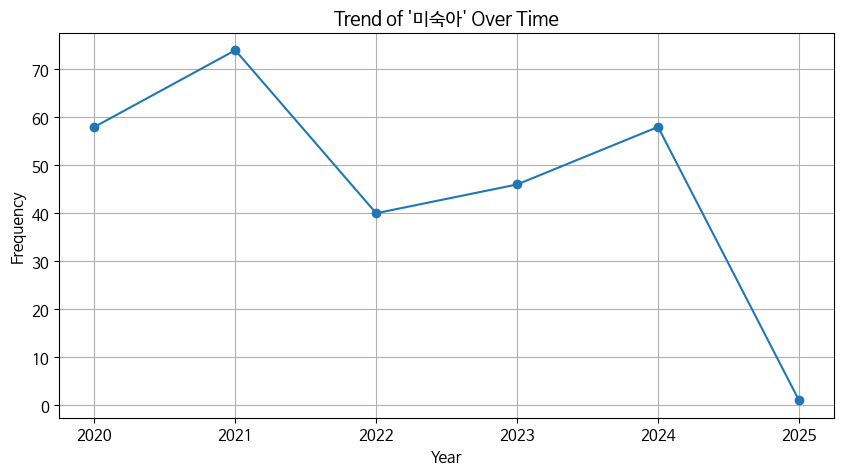

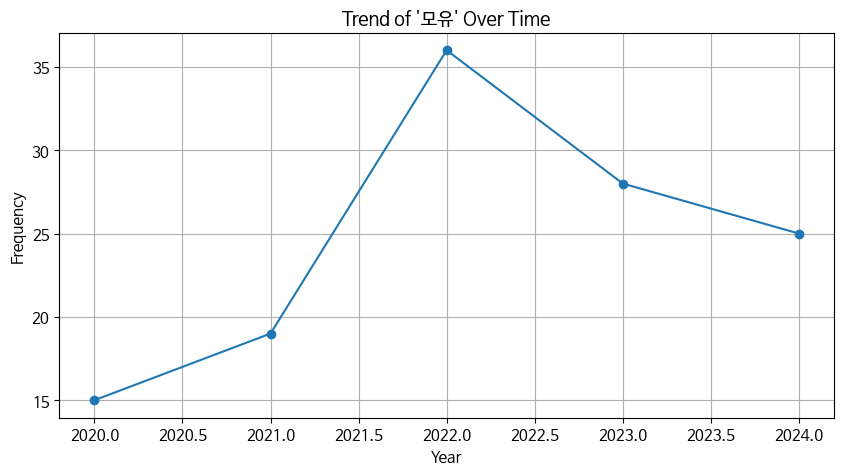

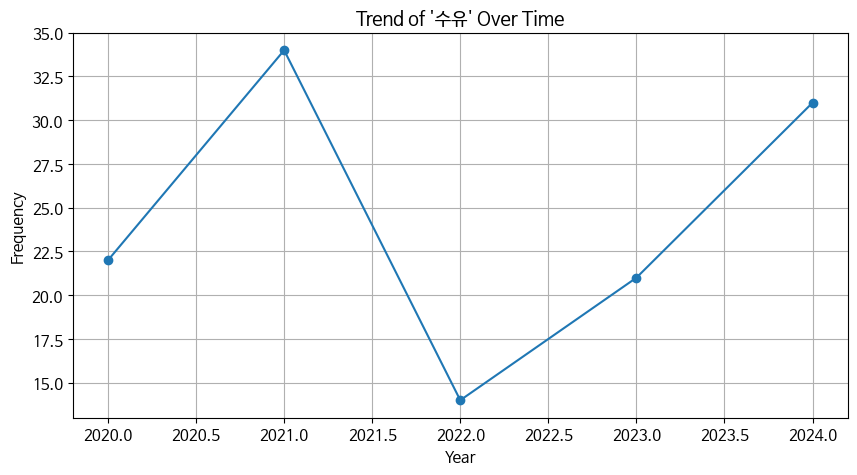

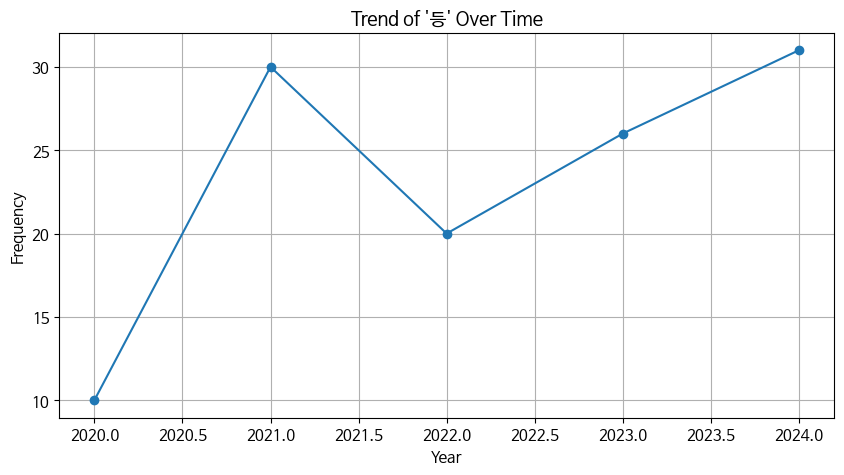

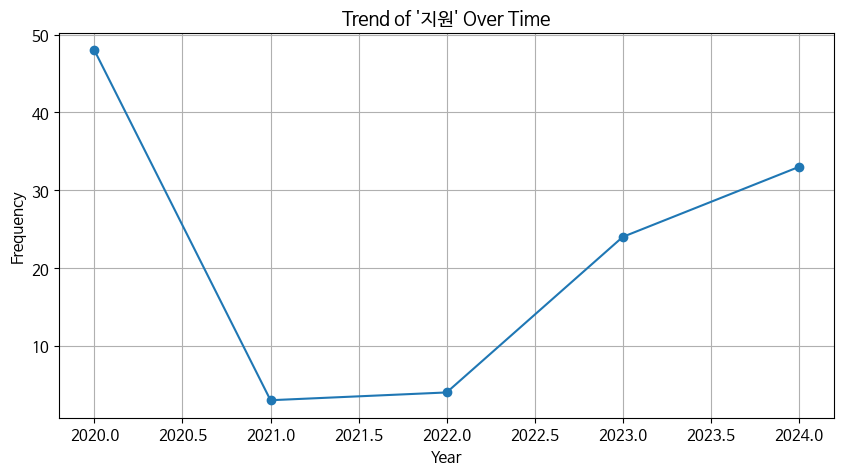

Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import os

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/뉴스크롤링/same"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
trend_data = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 저장
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        all_keywords.extend(tokens)

        # 연도별 키워드 추출
        trend_data.append({'year': row['pubDate'].year, 'keywords': tokens})

# 워드 클라우드 생성
print("Generating Word Cloud...")

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 파일 경로

word_counts = Counter(all_keywords)
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 키워드 간 상관관계 분석 (빈도 기반)
print("Keyword Correlation Analysis...")
from itertools import combinations
from collections import defaultdict

# 키워드 상관관계 저장
correlation = defaultdict(Counter)

for item in trend_data:
    keywords = item['keywords']
    for pair in combinations(keywords, 2):
        correlation[pair[0]][pair[1]] += 1

# 상관관계 데이터프레임 생성
correlation_df = pd.DataFrame.from_dict(correlation, orient='index').fillna(0)

# 시기별 키워드 트렌드 분석
print("Keyword Trend Analysis...")
trend_df = pd.DataFrame(trend_data)
trend_df = trend_df.explode('keywords')
trend_trends = trend_df.groupby(['year', 'keywords']).size().reset_index(name='frequency')

# 시기별 키워드 변화 시각화
for keyword in word_counts.most_common(5):
    keyword_name = keyword[0]
    keyword_trend = trend_trends[trend_trends['keywords'] == keyword_name]

    plt.figure(figsize=(10, 5))
    plt.plot(keyword_trend['year'], keyword_trend['frequency'], marker='o')
    plt.title(f"Trend of '{keyword_name}' Over Time")
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

print("Analysis Complete.")

# - 불용어 제거(추가)

- 워드 클라우드
-> 키워드 리스트 정의 기준

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-23-a769955475ca>:77: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 빨기 문제.csv
Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-23-a769955475ca>:77: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Generating Word Cloud...


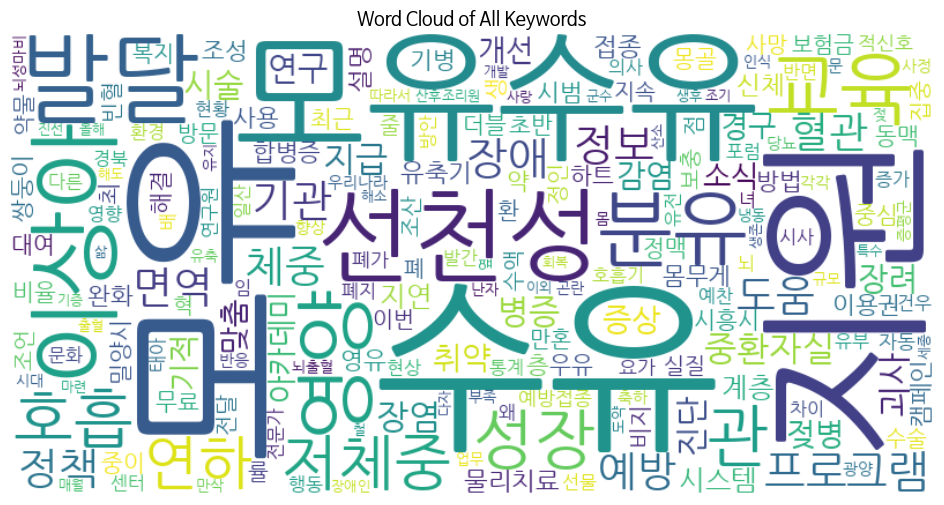

Keyword Correlation Analysis...
Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고','질식',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간','위','증진','이해','작업','백신','안과','설립','여부',
    '인과','관계','우울','스트레스','부모님','영웅','안심','동탄성심병원','포스트','다만','초기','공모','생애','최첨단',
    '부천시','양평군','바이러스','질환'
    ]

# 파일 경로 설정
folder_path = '/content/drive/MyDrive/뉴스크롤링/same'  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
trend_data = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 저장
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]
        all_keywords.extend(filtered_tokens)

        # 연도별 키워드 추출
        trend_data.append({'year': row['pubDate'].year, 'keywords': filtered_tokens})

# 워드 클라우드 생성
print("Generating Word Cloud...")

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 파일 경로

word_counts = Counter(all_keywords)
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 키워드 간 상관관계 분석 (빈도 기반)
print("Keyword Correlation Analysis...")
from itertools import combinations
from collections import defaultdict

# 키워드 상관관계 저장
correlation = defaultdict(Counter)

for item in trend_data:
    keywords = item['keywords']
    for pair in combinations(keywords, 2):
        correlation[pair[0]][pair[1]] += 1

# 상관관계 데이터프레임 생성
correlation_df = pd.DataFrame.from_dict(correlation, orient='index').fillna(0)

print("Analysis Complete.")


-> wordcloud 더블하트 수정

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-24-ecfebce74dbe>:79: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 빨기 문제.csv
Processing: 전처리된_미숙아 삼킴 문제.csv
Generating Word Cloud...


<ipython-input-24-ecfebce74dbe>:79: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


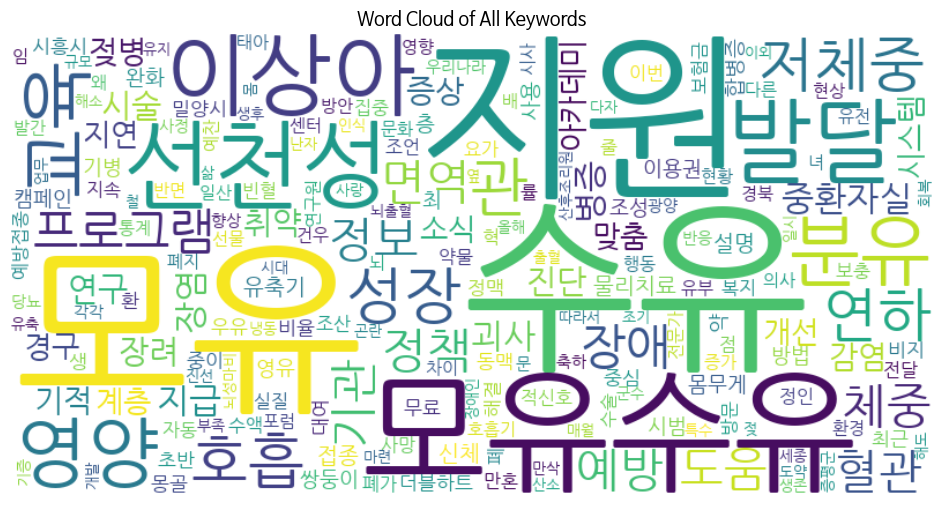

Keyword Correlation Analysis...
Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup
from itertools import combinations
from collections import defaultdict

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고','질식',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간','위','증진','이해','작업','백신','안과','설립','여부',
    '인과','관계','우울','스트레스','부모님','영웅','안심','동탄성심병원','포스트','다만','초기','공모','생애','최첨단',
    '부천시','양평군','바이러스','질환'
    ]

# 파일 경로 설정
folder_path = '/content/drive/MyDrive/뉴스크롤링/same'  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
trend_data = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 저장
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]

        # "더블"과 "하트" 결합 처리
        combined_tokens = []
        skip = False
        for i in range(len(filtered_tokens) - 1):
            if skip:
                skip = False
                continue
            if filtered_tokens[i] == "더블" and filtered_tokens[i + 1] == "하트":
                combined_tokens.append("더블하트")
                skip = True
            else:
                combined_tokens.append(filtered_tokens[i])
        if not skip:
            combined_tokens.append(filtered_tokens[-1])

        all_keywords.extend(combined_tokens)
        trend_data.append({'year': row['pubDate'].year, 'keywords': combined_tokens})

# 워드 클라우드 생성
print("Generating Word Cloud...")

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 파일 경로

word_counts = Counter(all_keywords)
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 키워드 간 상관관계 분석
print("Keyword Correlation Analysis...")

# 키워드 상관관계 저장
correlation = defaultdict(Counter)

for item in trend_data:
    keywords = item['keywords']
    for pair in combinations(keywords, 2):
        correlation[pair[0]][pair[1]] += 1

# 상관관계 데이터프레임 생성
correlation_df = pd.DataFrame.from_dict(correlation, orient='index').fillna(0)

print("Analysis Complete.")

- 연도별 키워드 분석

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-25-ce00bb89a0a6>:81: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 빨기 문제.csv
Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-25-ce00bb89a0a6>:81: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Analyzing yearly keyword trends...


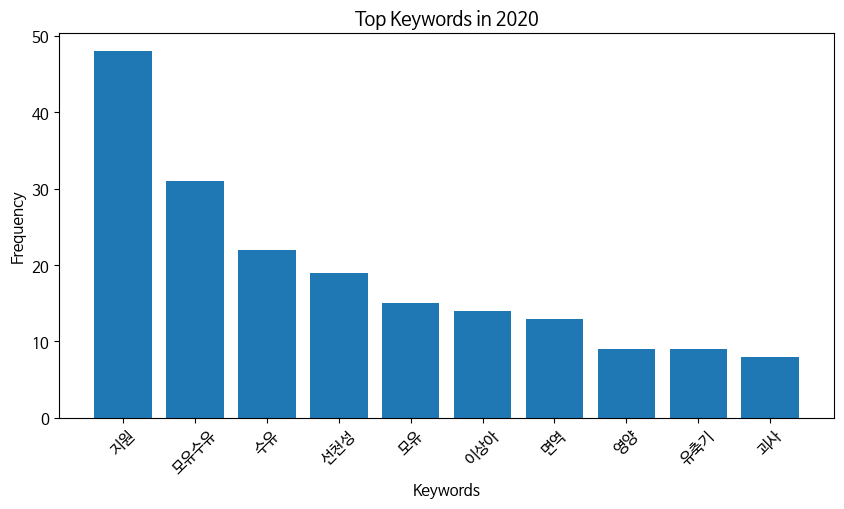

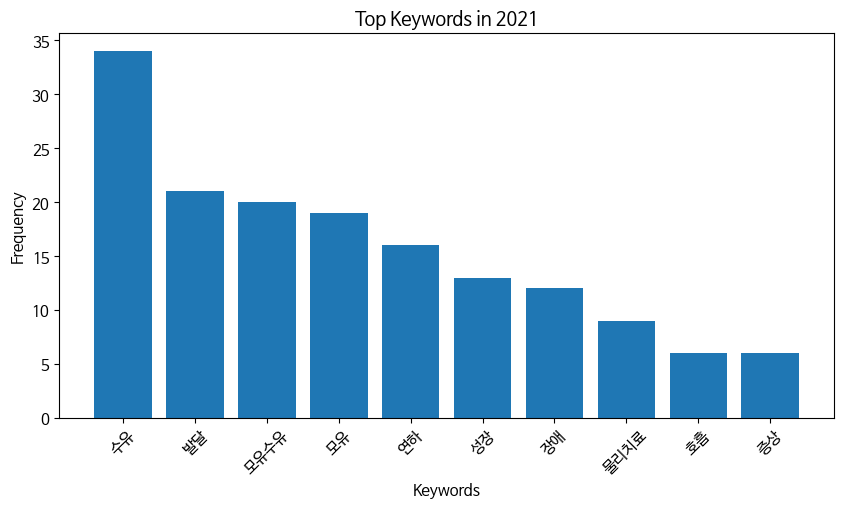

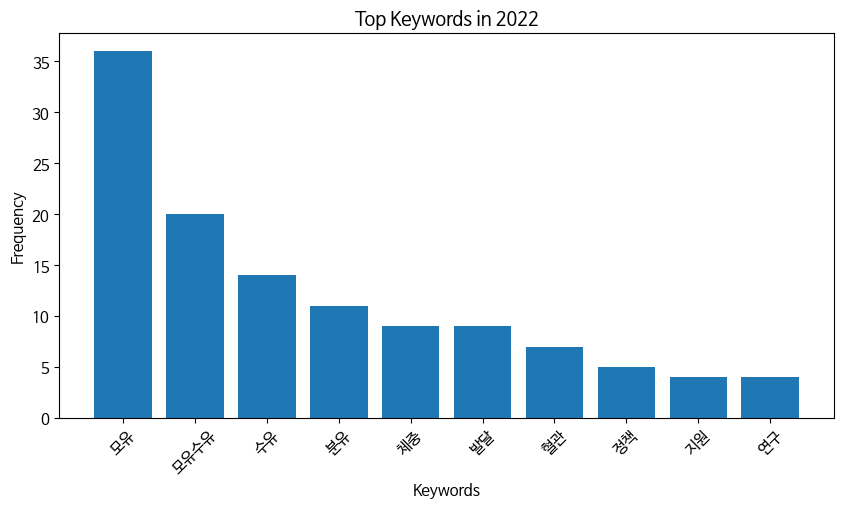

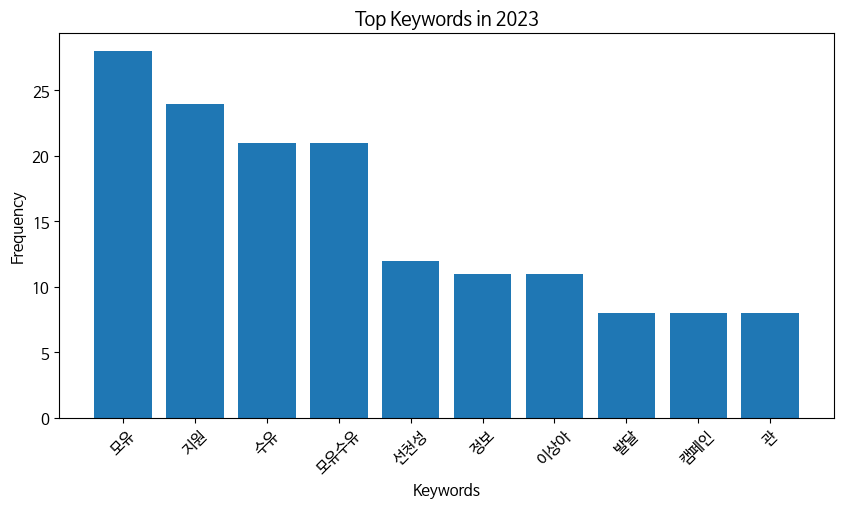

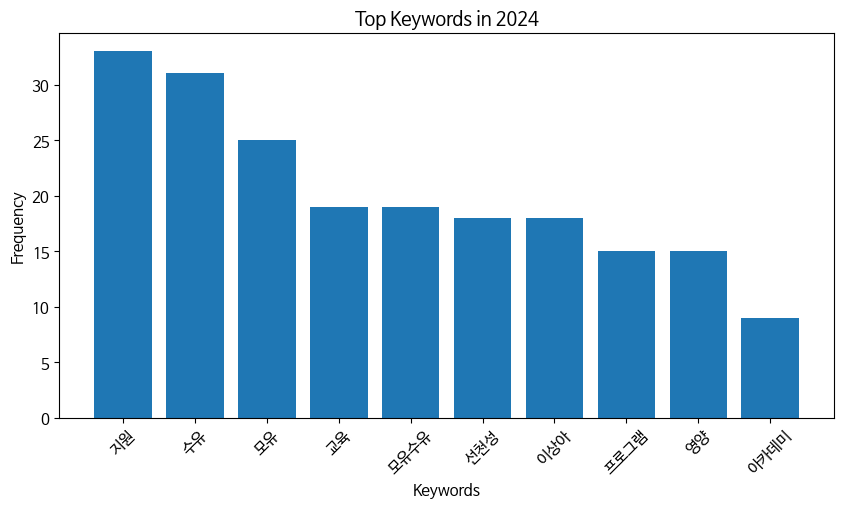

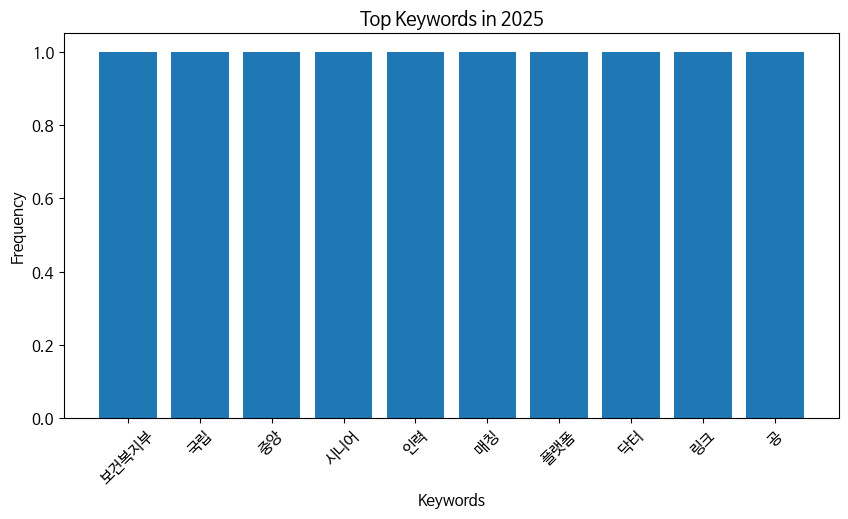

Yearly trend analysis complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup


# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호','률','혁','점','녀','임'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간','위','증진','이해','작업','백신','안과','설립','여부',
    '인과','관계','우울','스트레스','부모님','영웅','안심','동탄성심병원','포스트','다만','초기','공모','생애','최첨단',
    '접종','시흥시','최근','도움','지급','중환자실','병증','진단','장려','감염','소식','기적','개선','맞춤','지연','계층','설명','신체',
    '시스템','양평군','시범','최','영유','취약','이용권','약','사용','방법','쌍둥이','층','조성','환','밀양시','생','비율','해결','비지',
    '무료','대여','중이','몽골','초반','중심','수술','전달','지속','사망','보험금','빈혈','요가','약물','적신호','조산','예방접종','이번',
    '집중','자동','정인','폐가','조언','방문','만혼','실질','왜','광양','향상','환경','의사','반면','문','폐지','각각','유부','증가',
    '축하','행동','방안','건우','태아','사정','반응','문화','영향','일산','우리나라','선물','예찬','다른','현상','경북','포럼','발간',
    '통계','현황','시사','차이','만삭','따라서','부족','뇌출혈','이외','옆','바이러스','질환'
    ]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/뉴스크롤링/same"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 연도별 키워드 저장용
yearly_keywords = {}

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 연도별 키워드 추출 및 저장
    for _, row in data.iterrows():
        year = row['pubDate'].year
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]

        if year not in yearly_keywords:
            yearly_keywords[year] = []
        yearly_keywords[year].extend(filtered_tokens)

# 연도별 키워드 빈도 분석
print("Analyzing yearly keyword trends...")
yearly_keyword_counts = {}

for year, keywords in yearly_keywords.items():
    yearly_keyword_counts[year] = Counter(keywords).most_common(10)  # 상위 10개 키워드

# 연도별 트렌드 시각화
for year, keyword_counts in sorted(yearly_keyword_counts.items()):
    keywords, counts = zip(*keyword_counts)

    plt.figure(figsize=(10, 5))
    plt.bar(keywords, counts)
    plt.title(f"Top Keywords in {year}")
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

print("Yearly trend analysis complete.")

- 더블하트 (수정)

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-26-69f898f9ae42>:80: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 빨기 문제.csv
Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-26-69f898f9ae42>:80: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Analyzing yearly keyword trends...


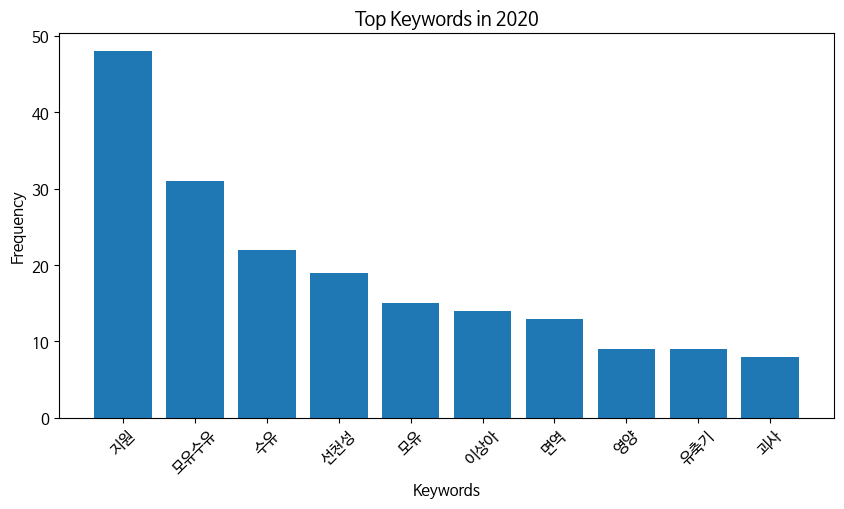

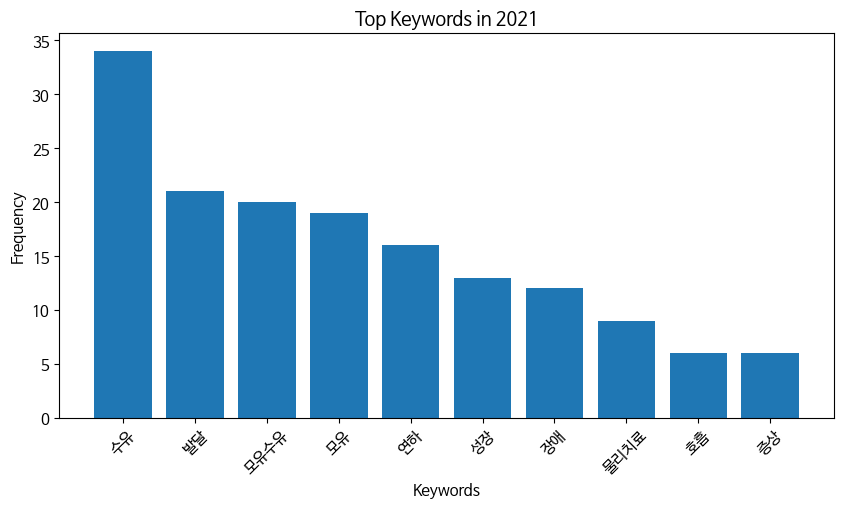

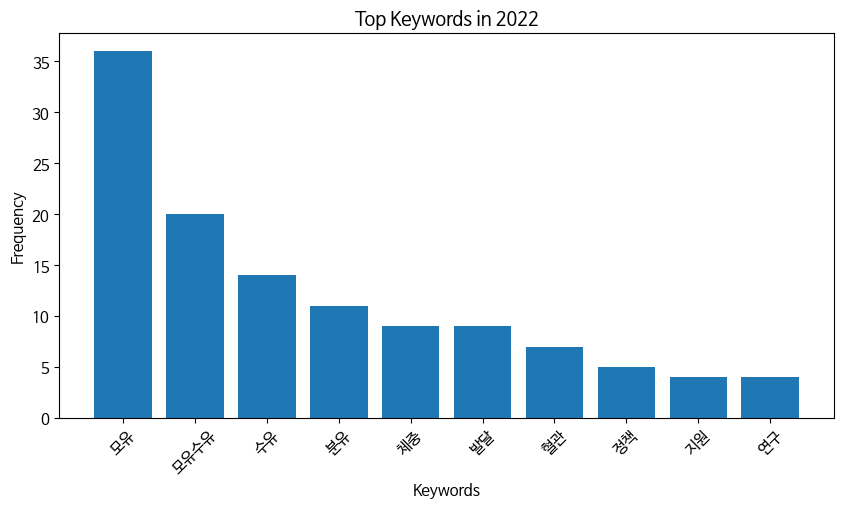

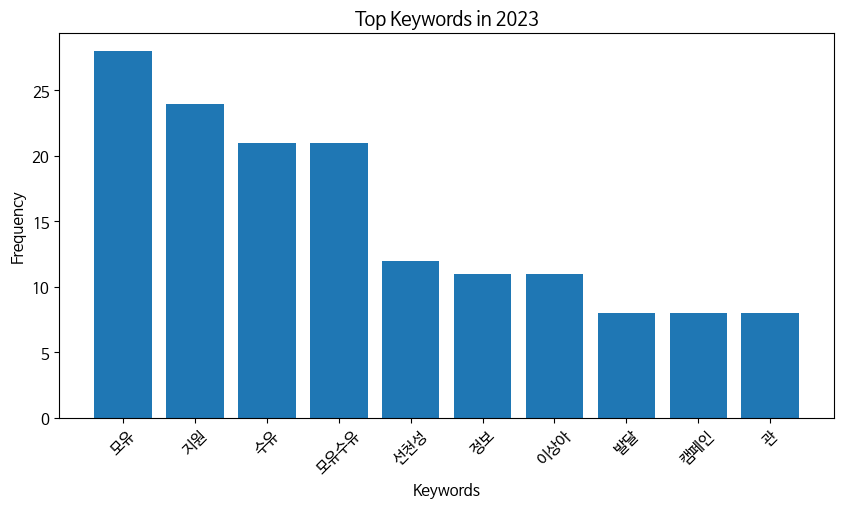

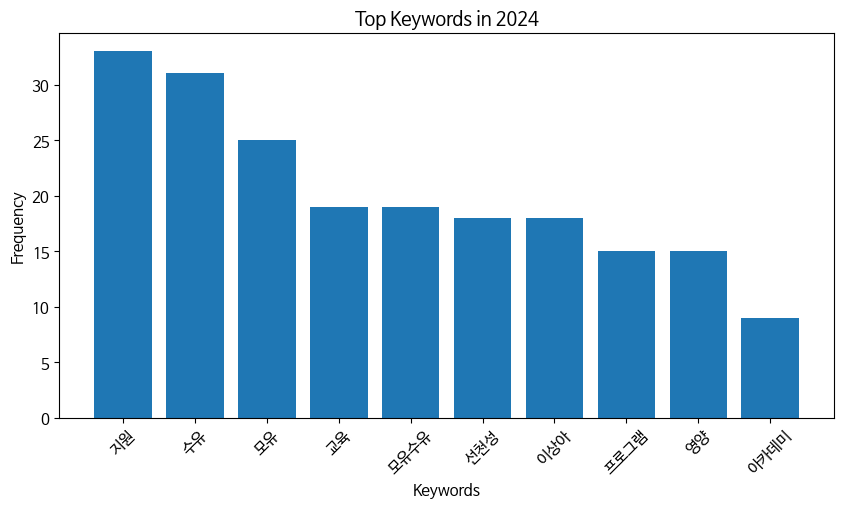

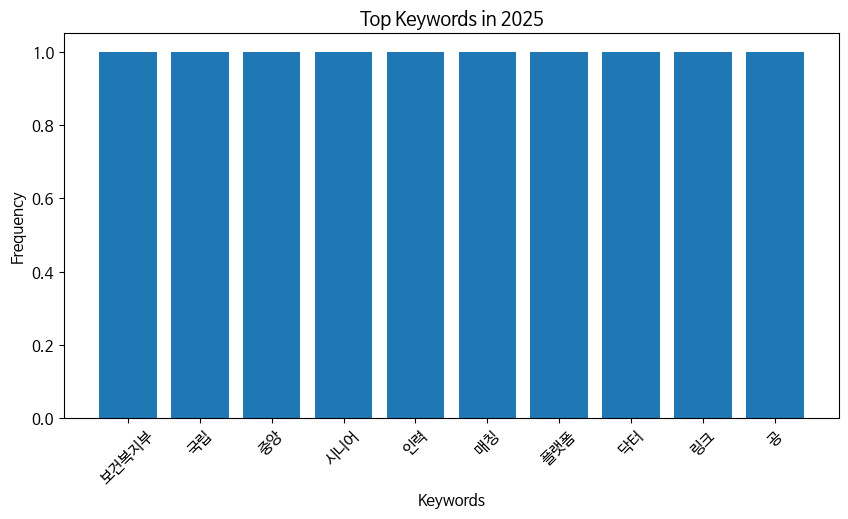

Yearly trend analysis complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호','률','혁','점','녀','임'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간','위','증진','이해','작업','백신','안과','설립','여부',
    '인과','관계','우울','스트레스','부모님','영웅','안심','동탄성심병원','포스트','다만','초기','공모','생애','최첨단',
    '접종','시흥시','최근','도움','지급','중환자실','병증','진단','장려','감염','소식','기적','개선','맞춤','지연','계층','설명','신체',
    '시스템','양평군','시범','최','영유','취약','이용권','약','사용','방법','쌍둥이','층','조성','환','밀양시','생','비율','해결','비지',
    '무료','대여','중이','몽골','초반','중심','수술','전달','지속','사망','보험금','빈혈','요가','약물','적신호','조산','예방접종','이번',
    '집중','자동','정인','폐가','조언','방문','만혼','실질','왜','광양','향상','환경','의사','반면','문','폐지','각각','유부','증가',
    '축하','행동','방안','건우','태아','사정','반응','문화','영향','일산','우리나라','선물','예찬','다른','현상','경북','포럼','발간',
    '통계','현황','시사','차이','만삭','따라서','부족','뇌출혈','이외','옆','바이러스','질환'
    ]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/뉴스크롤링/same"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 연도별 키워드 저장용
yearly_keywords = {}

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 연도별 키워드 추출 및 저장
    for _, row in data.iterrows():
        year = row['pubDate'].year
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]

        # 특정 키워드 결합 처리
        combined_tokens = []
        skip = False
        for i in range(len(filtered_tokens) - 1):
            if skip:
                skip = False
                continue
            # '더블' 다음 '하트'가 있으면 결합
            if filtered_tokens[i] == "더블" and filtered_tokens[i + 1] == "하트":
                combined_tokens.append("더블하트")
                skip = True
            else:
                combined_tokens.append(filtered_tokens[i])
        if not skip:  # 마지막 단어 추가
            combined_tokens.append(filtered_tokens[-1])

        if year not in yearly_keywords:
            yearly_keywords[year] = []
        yearly_keywords[year].extend(combined_tokens)

# 연도별 키워드 빈도 분석
print("Analyzing yearly keyword trends...")
yearly_keyword_counts = {}

for year, keywords in yearly_keywords.items():
    yearly_keyword_counts[year] = Counter(keywords).most_common(10)  # 상위 10개 키워드

# 연도별 트렌드 시각화
for year, keyword_counts in sorted(yearly_keyword_counts.items()):
    keywords, counts = zip(*keyword_counts)

    plt.figure(figsize=(10, 5))
    plt.bar(keywords, counts)
    plt.title(f"Top Keywords in {year}")
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

print("Yearly trend analysis complete.")

- 검색어 총 파일 키워드 rank 50

In [ ]:
!pip install konlpy

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-21-75a7702b50a0>:81: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 빨기 문제.csv
Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-21-75a7702b50a0>:81: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


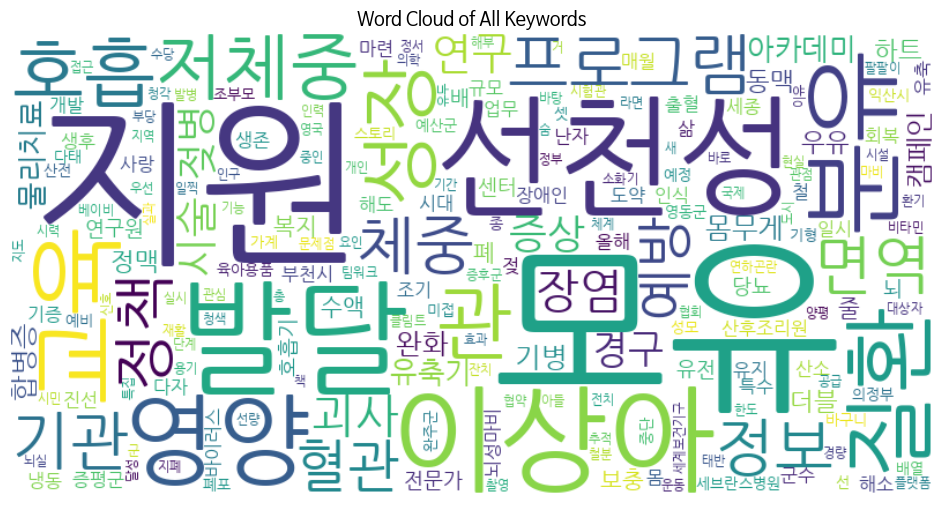

   Keyword  Frequency
0       모유        123
1       지원        112
2      선천성         49
3       발달         45
4      이상아         43
5       영양         31
6       분유         30
7       교육         28
8       질환         26
9        관         20
10      성장         19
11      호흡         18
12     저체중         17
13    프로그램         16
14      정보         15
15      정책         15
16      기관         15
17      체중         15
18      면역         15
19      혈관         14
20      예방         14
21      괴사         13
22      장염         13
23      시술         11
24      연구         11
25      증상         10
26      젖병         10
27      경구          9
28    아카데미          9
29    물리치료          9
30     유축기          9
31      기병          8
32     몸무게          8
33     캠페인          8
34     합병증          8
35      완화          8
36      더블          7
37      하트          7
38      동맥          7
39      우유          7
40      정맥          7
41       줄          6
42      복지          6
43       폐          6
44      수액

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호','률','혁','점','녀','임'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간','위','증진','이해','작업','백신','안과','설립','여부',
    '인과','관계','우울','스트레스','부모님','영웅','안심','동탄성심병원','포스트','다만','초기','공모','생애','최첨단',
    '접종','시흥시','최근','도움','지급','중환자실','병증','진단','장려','감염','소식','기적','개선','맞춤','지연','계층','설명','신체',
    '시스템','양평군','시범','최','영유','취약','이용권','약','사용','방법','쌍둥이','층','조성','환','밀양시','생','비율','해결','비지',
    '무료','대여','중이','몽골','초반','중심','수술','전달','지속','사망','보험금','빈혈','요가','약물','적신호','조산','예방접종','이번',
    '집중','자동','정인','폐가','조언','방문','만혼','실질','왜','광양','향상','환경','의사','반면','문','폐지','각각','유부','증가',
    '축하','행동','방안','건우','태아','사정','반응','문화','영향','일산','우리나라','선물','예찬','다른','현상','경북','포럼','발간',
    '통계','현황','시사','차이','만삭','따라서','부족','뇌출혈','이외','옆'
    ]

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/뉴스크롤링/same'  # 실제 경로에 맞게 수정

# 폴더 내 파일 목록 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [
            word for word in tokens
            if word not in stop_words and word not in remove_words and word not in essential_keywords
        ]
        all_keywords.extend(filtered_tokens)

# 상위 50개 키워드 추출
word_counts = Counter(all_keywords)
top_50_keywords = word_counts.most_common(50)

# 데이터프레임 생성
top_50_keywords_df = pd.DataFrame(top_50_keywords, columns=['Keyword', 'Frequency'])

# 워드 클라우드 생성
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 상위 50개 키워드 출력
print(top_50_keywords_df)

# CSV 파일로 저장
top_50_keywords_df.to_csv("top_50_keywords(navernews).csv", index=False, encoding='utf-8-sig')
print("상위 50개 키워드 데이터가 'top_50_keywords.csv(navernews)'로 저장되었습니다.")


- 더블하트 수정

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-11-d55e245d9086>:81: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 전처리된_미숙아 빨기 문제.csv
Processing: 전처리된_미숙아 삼킴 문제.csv


<ipython-input-11-d55e245d9086>:81: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


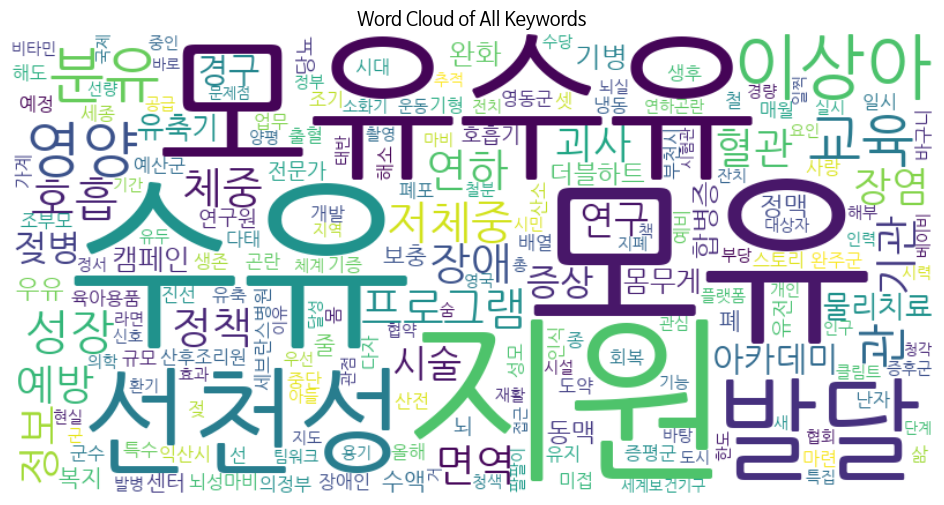

    Keyword  Frequency
0        모유        123
1        수유        122
2        지원        112
3      모유수유        111
4       선천성         49
..      ...        ...
195     문제점          3
196      청각          3
197      바로          3
198      단계          3
199      접근          3

[200 rows x 2 columns]
상위 50개 키워드 데이터가 'top_50_keywords(navernews).csv'로 저장되었습니다.


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호','률','혁','점','녀','임'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간','위','증진','이해','작업','백신','안과','설립','여부',
    '인과','관계','우울','스트레스','부모님','영웅','안심','동탄성심병원','포스트','다만','초기','공모','생애','최첨단',
    '접종','시흥시','최근','도움','지급','중환자실','병증','진단','장려','감염','소식','기적','개선','맞춤','지연','계층','설명','신체',
    '시스템','양평군','시범','최','영유','취약','이용권','약','사용','방법','쌍둥이','층','조성','환','밀양시','생','비율','해결','비지',
    '무료','대여','중이','몽골','초반','중심','수술','전달','지속','사망','보험금','빈혈','요가','약물','적신호','조산','예방접종','이번',
    '집중','자동','정인','폐가','조언','방문','만혼','실질','왜','광양','향상','환경','의사','반면','문','폐지','각각','유부','증가',
    '축하','행동','방안','건우','태아','사정','반응','문화','영향','일산','우리나라','선물','예찬','다른','현상','경북','포럼','발간',
    '통계','현황','시사','차이','만삭','따라서','부족','뇌출혈','이외','옆','바이러스','질환','배'
    ]

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/뉴스크롤링/same'  # 실제 경로에 맞게 수정

# 폴더 내 파일 목록 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 필터링
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = []
        skip = False
        for i in range(len(tokens) - 1):
            if skip:
                skip = False
                continue
            if tokens[i] == "더블" and tokens[i + 1] == "하트":
                filtered_tokens.append("더블하트")
                skip = True
            else:
                filtered_tokens.append(tokens[i])
        if not skip:
            filtered_tokens.append(tokens[-1])

        filtered_tokens = [
            word for word in filtered_tokens
            if word not in stop_words and word not in remove_words
        ]
        all_keywords.extend(filtered_tokens)

# 상위 50개 키워드 추출
word_counts = Counter(all_keywords)
top_50_keywords = word_counts.most_common(200)

# 데이터프레임 생성
top_50_keywords_df = pd.DataFrame(top_50_keywords, columns=['Keyword', 'Frequency'])

# 워드 클라우드 생성
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 상위 50개 키워드 출력
print(top_50_keywords_df)

# CSV 파일로 저장
top_50_keywords_df.to_csv("top_50_keywords(navernews).csv", index=False, encoding='utf-8-sig')
print("상위 50개 키워드 데이터가 'top_50_keywords(navernews).csv'로 저장되었습니다.")

- 토픽 모델링 (종합)

In [ ]:
tokenized_documents = data['title'].apply(lambda x: okt.morphs(x, stem=True)).tolist()

Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-14-acf4e7340811>:67: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if pd.notnull(x) else "")


Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_신생아 빨기 문제 원인.csv
Processing: 중복제거_전처리된_아기 빨기 문제.csv
Processing: 중복제거_전처리된_아기 삼킴 문제.csv
Processing: 중복제거_전처리된_신생아 삼킴 문제.csv
Processing: 중복제거_전처리된_아기 구강 문제.csv


<ipython-input-14-acf4e7340811>:66: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if pd.notnull(x) else "")
<ipython-input-14-acf4e7340811>:67: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if pd.notnull(x) else "")


Processing: 중복제거_전처리된_아기 빠는 힘.csv


<ipython-input-14-acf4e7340811>:66: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if pd.notnull(x) else "")


Processing: 중복제거_전처리된_연하 장애 영아 사례.csv

===== LDA Topics =====

Topic 0: 0.010*"선천성" + 0.009*"모유수유" + 0.008*"이상아" + 0.007*"구강" + 0.007*"손가락" + 0.006*"예방" + 0.005*"질환" + 0.005*"손" + 0.004*"젖" + 0.004*"해결"
Topic 1: 0.014*"구강" + 0.011*"발달" + 0.008*"위" + 0.007*"망막" + 0.007*"영양" + 0.006*"성장" + 0.005*"모유수유" + 0.004*"접종" + 0.004*"체중" + 0.004*"분유"
Topic 2: 0.014*"모유수유" + 0.013*"구강" + 0.007*"위" + 0.007*"교육" + 0.006*"장애" + 0.006*"연하" + 0.005*"젖" + 0.005*"진단" + 0.004*"선천성" + 0.004*"질환"
Topic 3: 0.016*"젖병" + 0.014*"구강" + 0.008*"구순구개열" + 0.007*"위" + 0.006*"힘" + 0.005*"관" + 0.005*"입" + 0.005*"유한킴벌리" + 0.005*"재활" + 0.005*"젖"
Topic 4: 0.019*"구강" + 0.007*"설소대" + 0.006*"젖" + 0.006*"혀" + 0.005*"입" + 0.005*"접촉" + 0.005*"관" + 0.005*"발달" + 0.004*"유리" + 0.004*"다른"


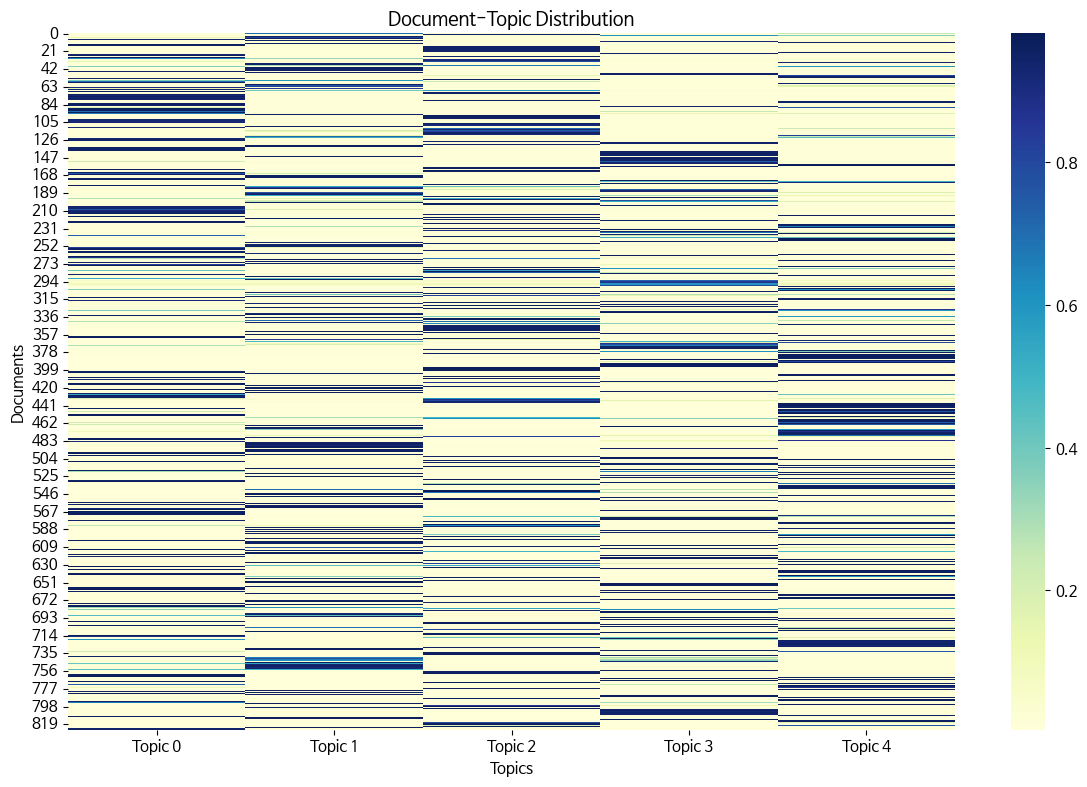

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from bs4 import BeautifulSoup
from gensim import corpora, models
import seaborn as sns

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '캠페인', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '지원', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우', '모유', '수유','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','하트','더블','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','센터','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고','질식',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간'
    ]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/뉴스크롤링/전처리/processed"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
tokenized_documents = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 데이터 정제
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if pd.notnull(x) else "")
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if pd.notnull(x) else "")

    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]
        tokenized_documents.append(filtered_tokens)

# 토픽 모델링 함수
def topic_modeling(tokenized_documents, num_topics=5):
    dictionary = corpora.Dictionary(tokenized_documents)
    corpus = [dictionary.doc2bow(text) for text in tokenized_documents]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

    print("\n===== LDA Topics =====\n")
    topics = lda_model.print_topics(num_words=10)
    for idx, topic in topics:
        print(f"Topic {idx}: {topic}")

    return lda_model, corpus, dictionary

lda_model, corpus, dictionary = topic_modeling(tokenized_documents)

# 문서-토픽 분포 히트맵 (추가 시각화 옵션)
def plot_document_topic_heatmap(corpus, lda_model, num_topics=5):
    doc_topics = []
    for doc in corpus:
        topic_dist = lda_model.get_document_topics(doc, minimum_probability=0.0)
        topic_dist = [prob for _, prob in topic_dist]
        doc_topics.append(topic_dist)

    # DataFrame 변환
    df_doc_topics = pd.DataFrame(doc_topics, columns=[f"Topic {i}" for i in range(num_topics)])

    # 히트맵 그리기
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_doc_topics, cmap="YlGnBu", annot=False)
    plt.title("Document-Topic Distribution")
    plt.xlabel("Topics")
    plt.ylabel("Documents")
    plt.tight_layout()
    plt.show()

plot_document_topic_heatmap(corpus, lda_model)


- 토픽 수 직접 지정

In [ ]:
import os
import pandas as pd
from gensim import corpora, models
from konlpy.tag import Okt
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '캠페인', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '지원', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우', '모유', '수유','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','하트','더블','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','센터','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고','질식',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간'
    ]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/뉴스크롤링/전처리/processed"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 사용자 입력: 토픽 수 설정
while True:
    try:
        num_topics = int(input("Enter the number of topics for LDA: "))  # 토픽 수 입력
        if num_topics > 0:
            break
        else:
            print("Please enter a positive integer.")
    except ValueError:
        print("Invalid input. Please enter a positive integer.")

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
tokenized_documents = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 데이터 정제
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]
        all_keywords.extend(filtered_tokens)
        tokenized_documents.append(filtered_tokens)

# 토픽 모델링 함수
def topic_modeling(tokenized_documents, num_topics):
    dictionary = corpora.Dictionary(tokenized_documents)
    corpus = [dictionary.doc2bow(text) for text in tokenized_documents]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

    print("\n===== LDA Topics =====\n")
    topics = lda_model.print_topics(num_words=10)
    for idx, topic in topics:
        print(f"Topic {idx}: {topic}")

    return lda_model, corpus, dictionary

# 토픽 모델링 수행
lda_model, corpus, dictionary = topic_modeling(tokenized_documents, num_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter the number of topics for LDA: 10
Processing: 중복제거_전처리된_연하 장애 영아 사례.csv
Processing: 중복제거_전처리된_아기 빠는 힘.csv


<ipython-input-43-c85146f6e7fe>:67: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 중복제거_전처리된_신생아 빨기 문제 원인.csv
Processing: 중복제거_전처리된_신생아 삼킴 문제.csv
Processing: 중복제거_전처리된_아기 구강 문제.csv


<ipython-input-43-c85146f6e7fe>:67: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-43-c85146f6e7fe>:68: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 중복제거_전처리된_아기 삼킴 문제.csv
Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-43-c85146f6e7fe>:68: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 중복제거_전처리된_아기 빨기 문제.csv
Processing: 중복제거_전처리된_미숙아 수유 어려움.csv

===== LDA Topics =====

Topic 0: 0.019*"구강" + 0.013*"관리" + 0.009*"연하" + 0.009*"재활" + 0.009*"예랑" + 0.009*"센터" + 0.006*"장애" + 0.006*"부모" + 0.006*"산후" + 0.006*"젖"
Topic 1: 0.016*"선천성" + 0.015*"모유수유" + 0.015*"구강" + 0.014*"이상아" + 0.009*"교육" + 0.006*"검사" + 0.006*"프로그램" + 0.006*"치과" + 0.006*"저출산" + 0.005*"관리"
Topic 2: 0.025*"구순구개열" + 0.015*"젖병" + 0.010*"유한킴벌리" + 0.009*"구강" + 0.007*"위" + 0.005*"안면" + 0.005*"힘" + 0.005*"시술" + 0.005*"입" + 0.004*"외과"
Topic 3: 0.014*"관" + 0.010*"출생" + 0.009*"망막" + 0.008*"접촉" + 0.006*"생명" + 0.006*"혈관" + 0.005*"표" + 0.005*"구강" + 0.005*"면역" + 0.005*"체중"
Topic 4: 0.015*"구강" + 0.012*"치아" + 0.008*"외상" + 0.007*"위" + 0.007*"관리" + 0.005*"분유" + 0.005*"나" + 0.005*"피부" + 0.005*"모유수유" + 0.005*"어린이"
Topic 5: 0.015*"구강" + 0.011*"손가락" + 0.009*"손" + 0.008*"치아" + 0.008*"젖병" + 0.007*"관리" + 0.007*"질식" + 0.007*"젖꼭지" + 0.006*"충치" + 0.006*"예방"
Topic 6: 0.008*"구강" + 0.008*"입

# 각 10개 csv 파일  분석

In [ ]:
!pip install pandas matplotlib wordcloud konlpy beautifulsoup4

- 워드 클라우드

In [ ]:
# Install konlpy (if not already installed)
!pip install konlpy==0.6.0
# Install wordcloud (if not already installed)
!pip install wordcloud==1.9.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-25-81a26de98dc8>:78: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


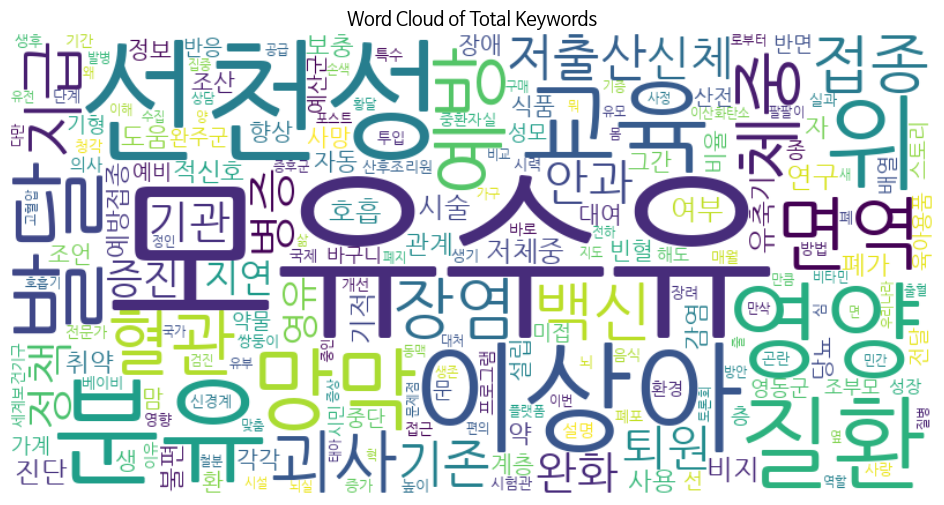

Processing: 중복제거_전처리된_미숙아 수유 어려움.csv


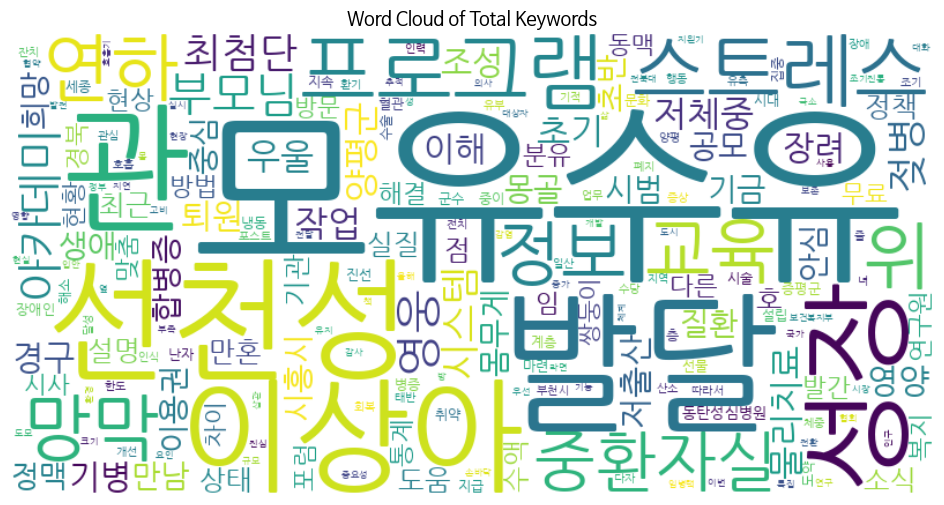

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv


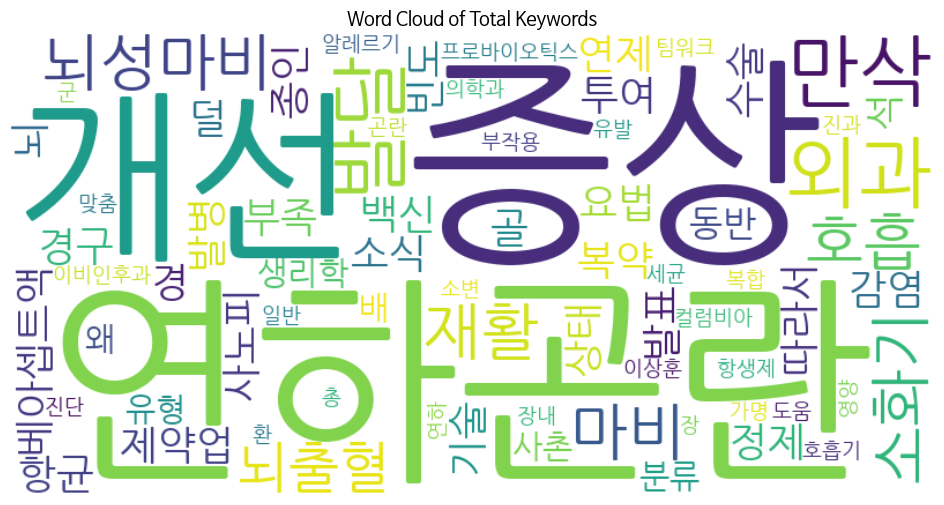

Processing: 중복제거_전처리된_신생아 빨기 문제 원인.csv


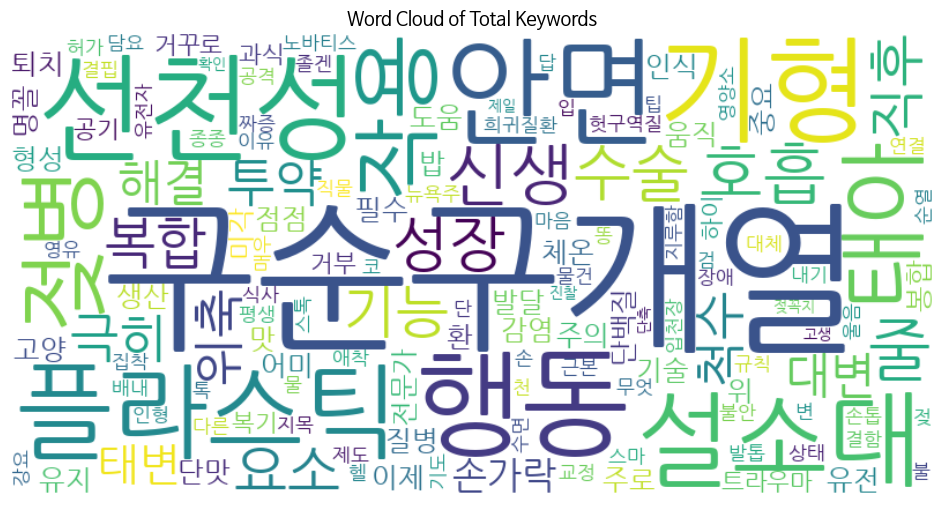

Processing: 중복제거_전처리된_아기 빨기 문제.csv


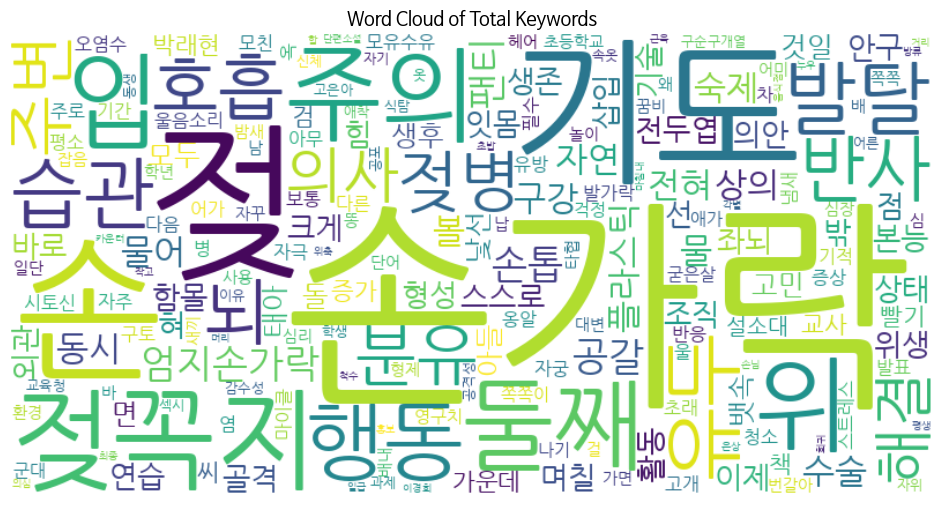

Processing: 중복제거_전처리된_아기 삼킴 문제.csv


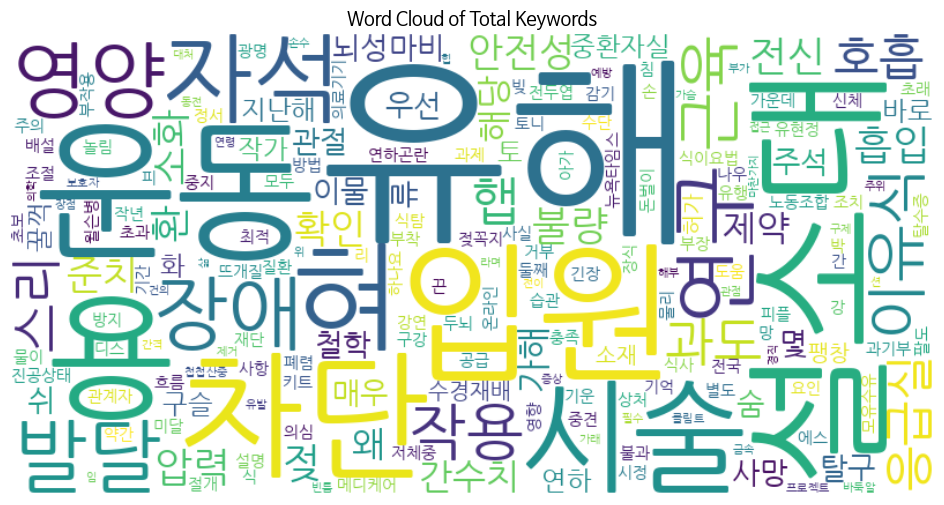

Processing: 중복제거_전처리된_신생아 삼킴 문제.csv


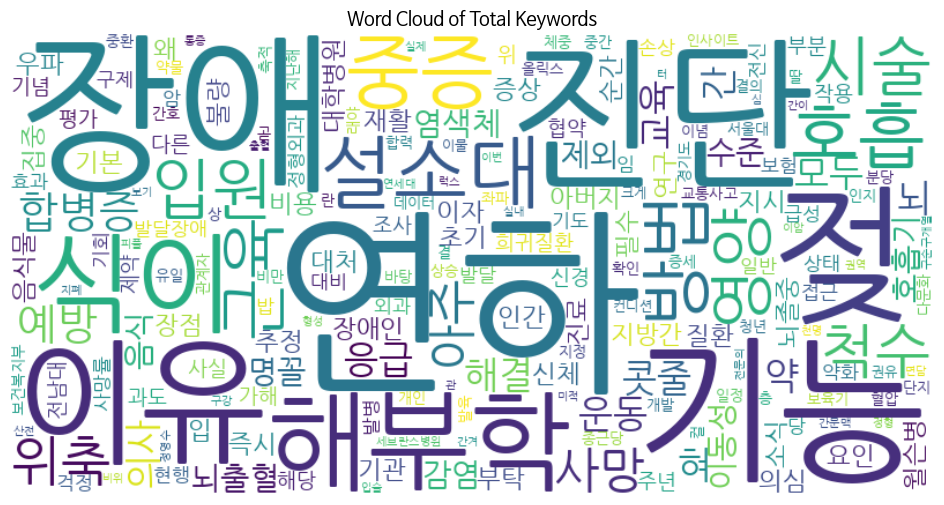

Processing: 중복제거_전처리된_아기 구강 문제.csv


<ipython-input-25-81a26de98dc8>:77: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-25-81a26de98dc8>:78: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


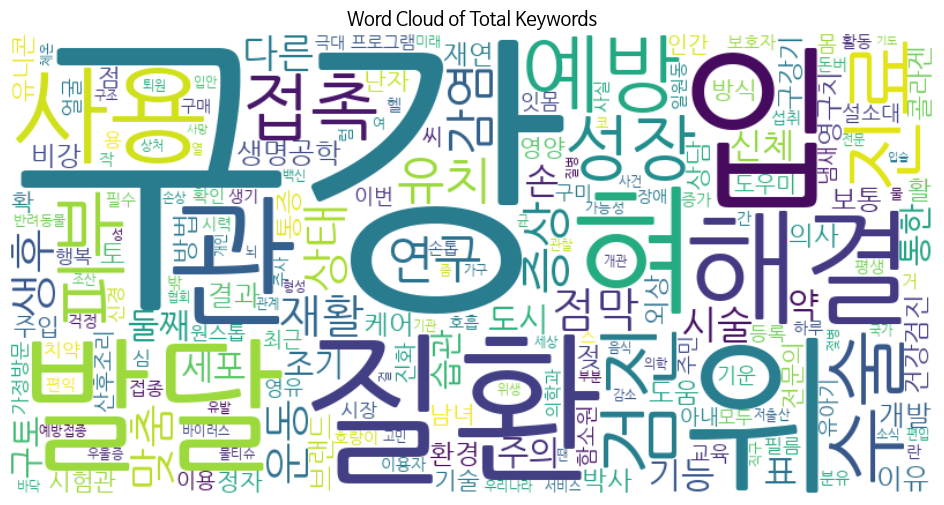

Processing: 중복제거_전처리된_아기 빠는 힘.csv


<ipython-input-25-81a26de98dc8>:77: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


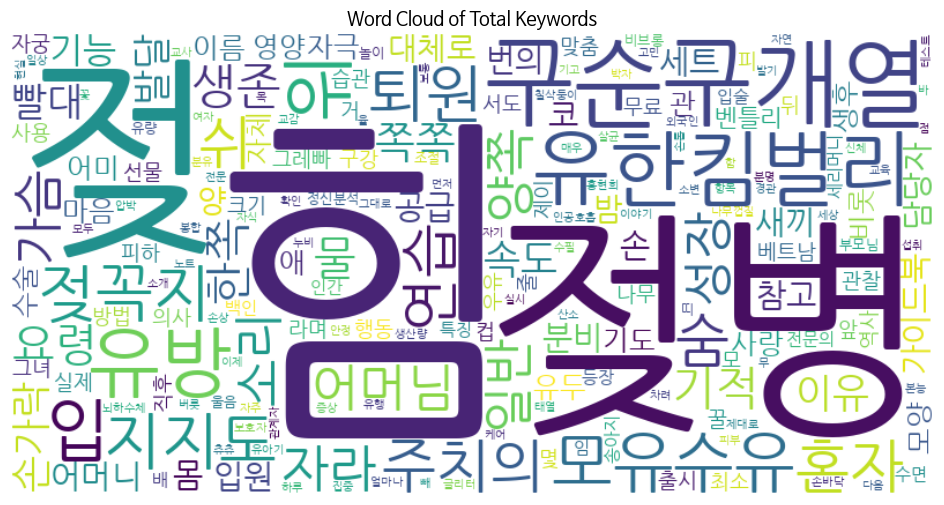

Processing: 중복제거_전처리된_연하 장애 영아 사례.csv


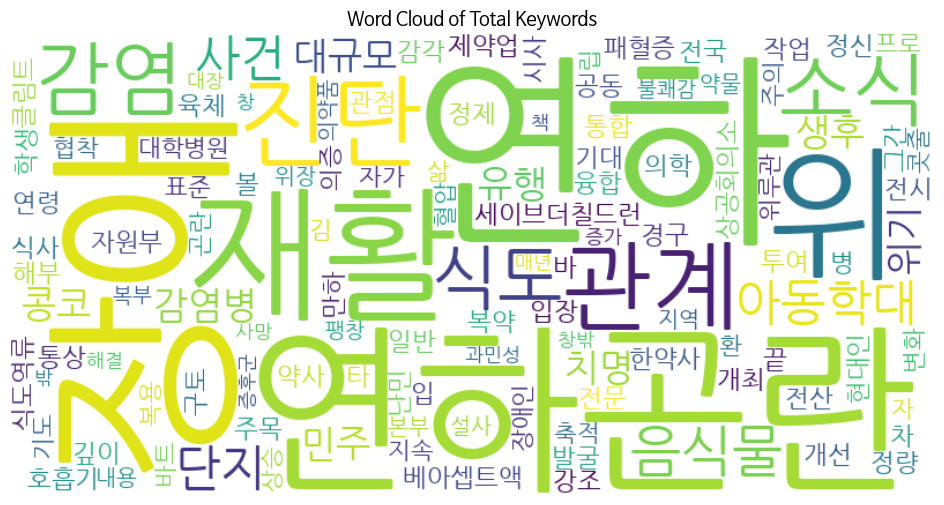

Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from bs4 import BeautifulSoup
import os
from itertools import combinations
from collections import defaultdict

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '캠페인', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '지원', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우', '모유', '수유','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','하트','더블','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','센터','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고','질식',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간'
    ]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/뉴스크롤링/전처리/processed"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 한글 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if not os.path.exists(font_path):
    print("Font not found. Please check the font path.")
    font_path = None

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환 및 결측치 제거
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 저장
    all_keywords = []
    trend_data = []

    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])

        # 불용어 및 제거할 단어 필터링
        tokens = [word for word in tokens if word not in stop_words and word not in remove_words]
        all_keywords.extend(tokens)
        trend_data.append({'year': row['pubDate'].year, 'keywords': tokens})

    # 워드 클라우드 생성
    word_counts = Counter(all_keywords)
    wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
    wordcloud.generate_from_frequencies(word_counts)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Total Keywords')
    plt.show()

print("Analysis Complete.")


- 빈도분석 및 토픽모델링

In [ ]:
!pip install gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-566c41531920>:79: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv
Generating Keyword Analysis for 중복제거_전처리된_미숙아 모유수유 문제.csv...


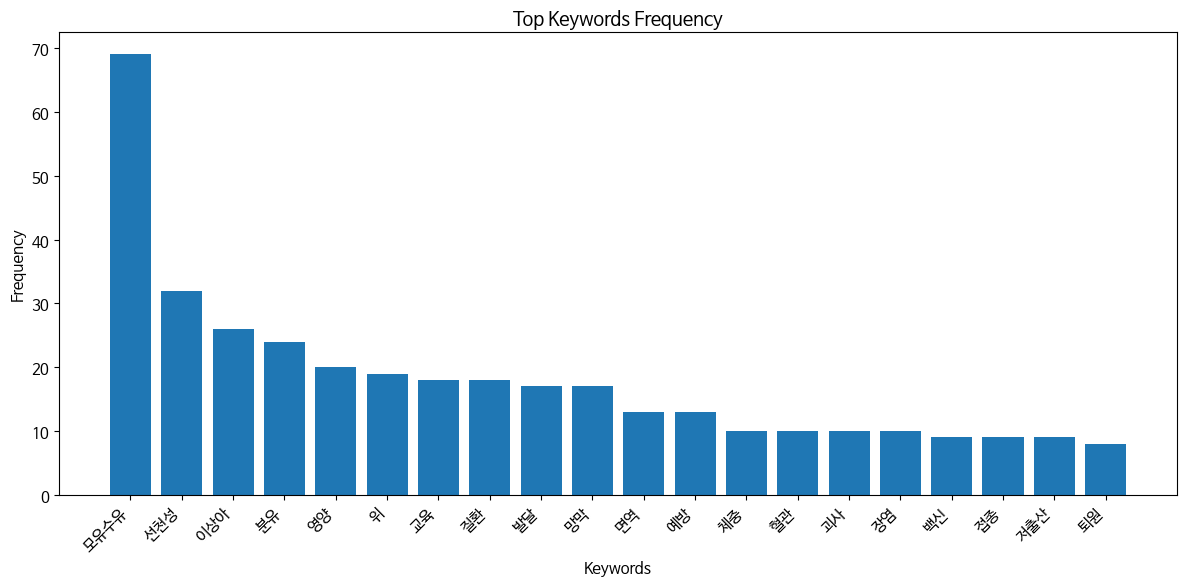

Processing: 중복제거_전처리된_미숙아 수유 어려움.csv
Generating Keyword Analysis for 중복제거_전처리된_미숙아 수유 어려움.csv...


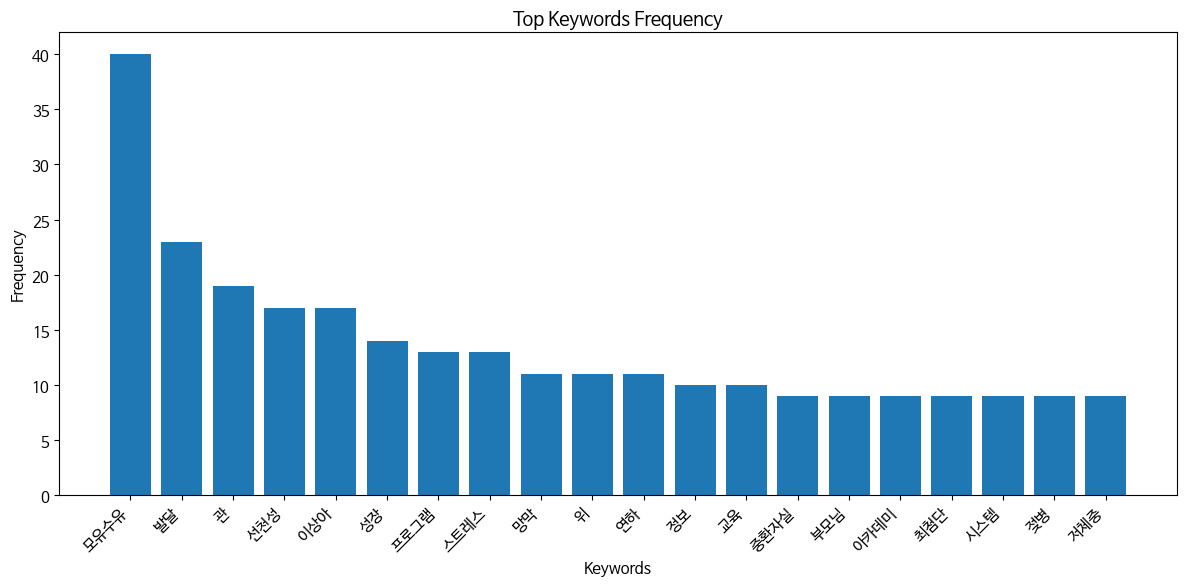

Processing: 중복제거_전처리된_미숙아 연하 곤란.csv
Generating Keyword Analysis for 중복제거_전처리된_미숙아 연하 곤란.csv...


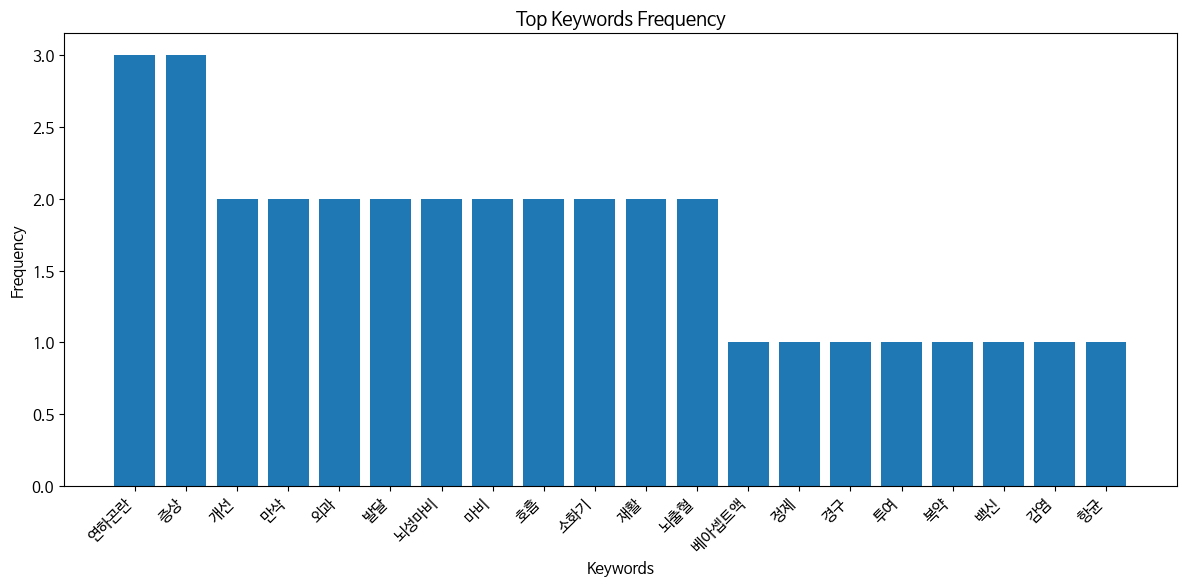

Processing: 중복제거_전처리된_신생아 빨기 문제 원인.csv
Generating Keyword Analysis for 중복제거_전처리된_신생아 빨기 문제 원인.csv...


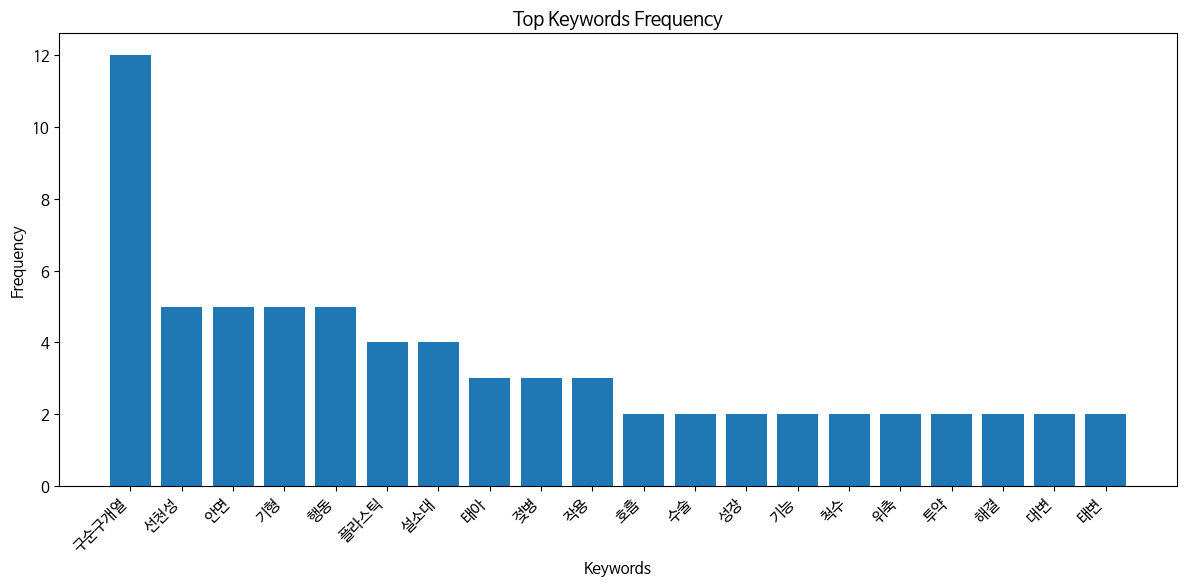

Processing: 중복제거_전처리된_아기 빨기 문제.csv
Generating Keyword Analysis for 중복제거_전처리된_아기 빨기 문제.csv...


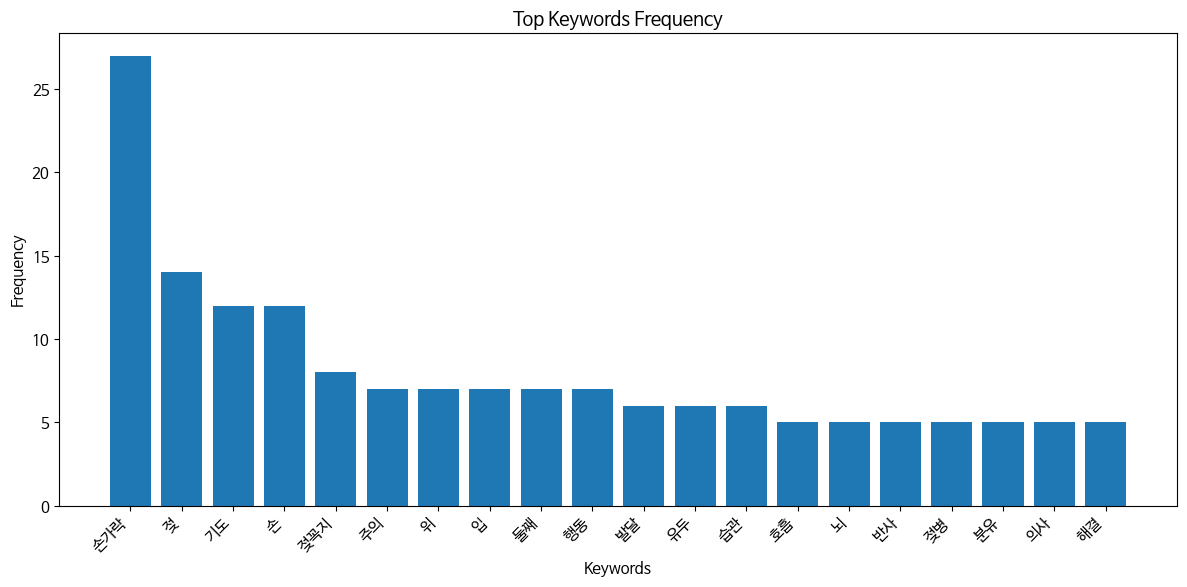

Processing: 중복제거_전처리된_아기 삼킴 문제.csv
Generating Keyword Analysis for 중복제거_전처리된_아기 삼킴 문제.csv...


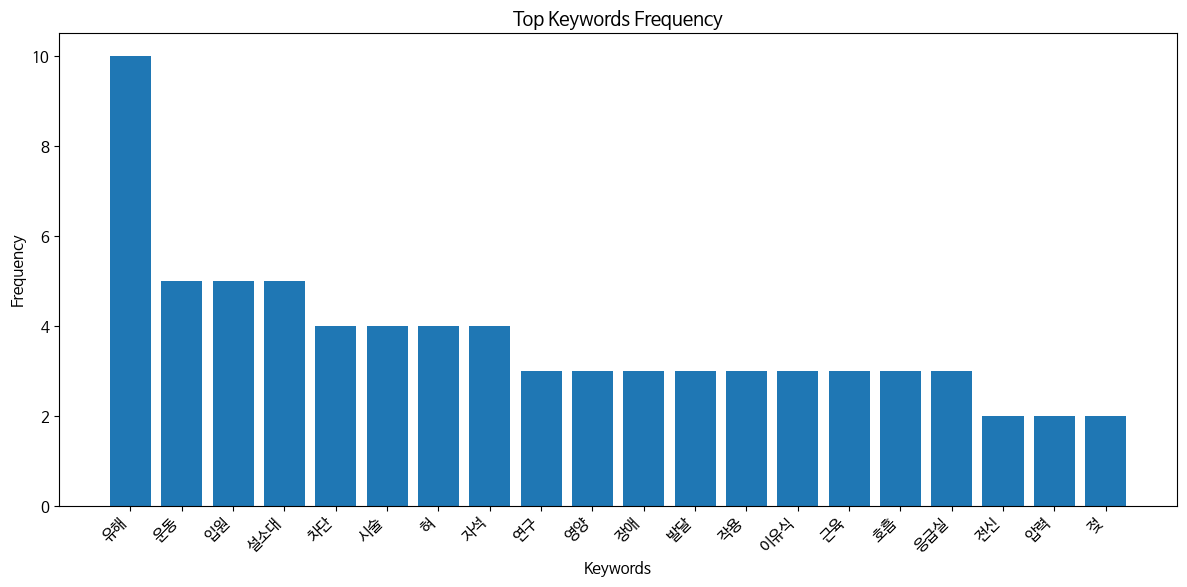

Processing: 중복제거_전처리된_신생아 삼킴 문제.csv
Generating Keyword Analysis for 중복제거_전처리된_신생아 삼킴 문제.csv...


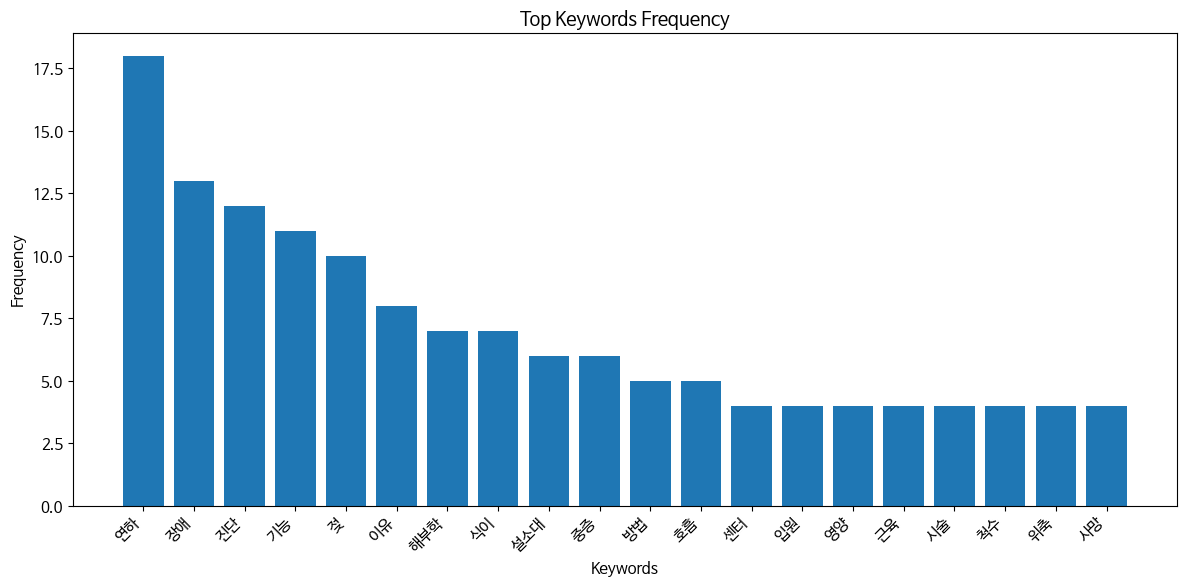

Processing: 중복제거_전처리된_아기 구강 문제.csv


<ipython-input-30-566c41531920>:78: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-30-566c41531920>:79: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Generating Keyword Analysis for 중복제거_전처리된_아기 구강 문제.csv...


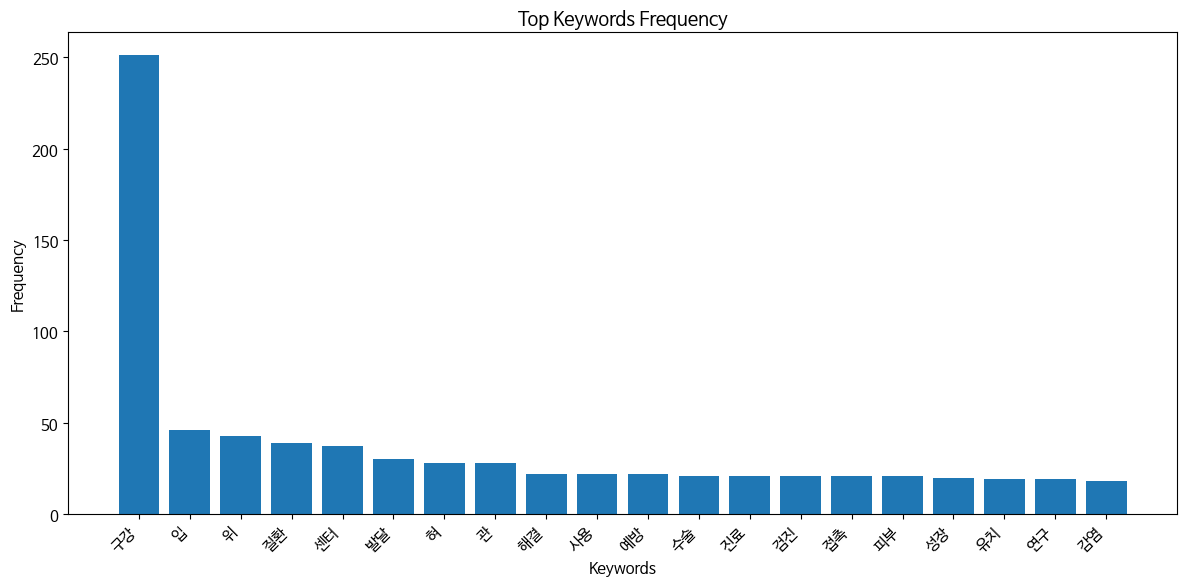

Processing: 중복제거_전처리된_아기 빠는 힘.csv


<ipython-input-30-566c41531920>:78: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Generating Keyword Analysis for 중복제거_전처리된_아기 빠는 힘.csv...


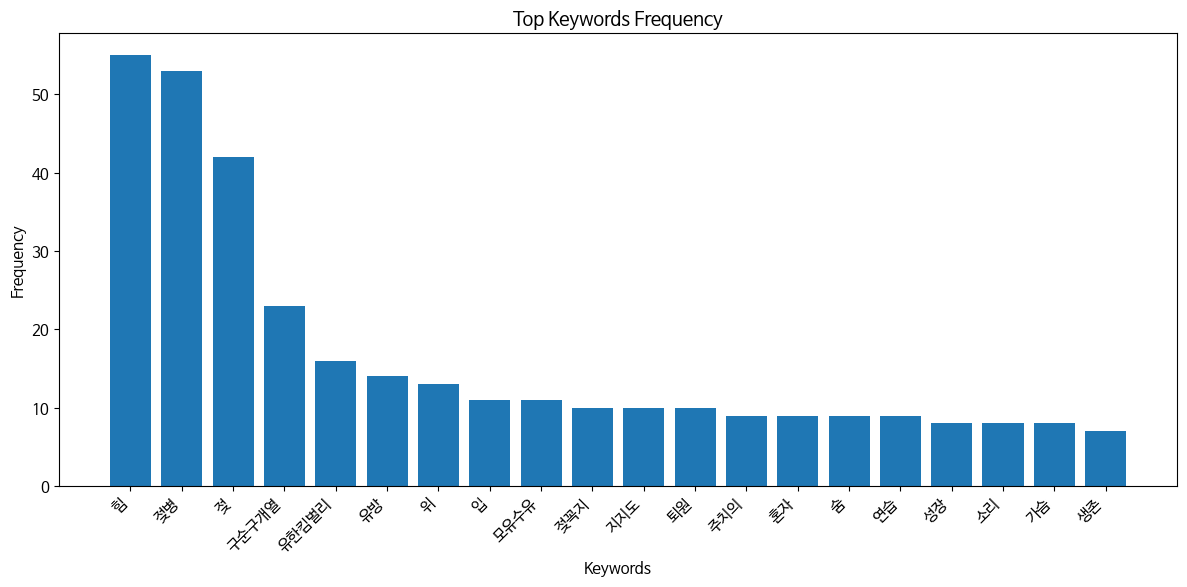

Processing: 중복제거_전처리된_연하 장애 영아 사례.csv
Generating Keyword Analysis for 중복제거_전처리된_연하 장애 영아 사례.csv...


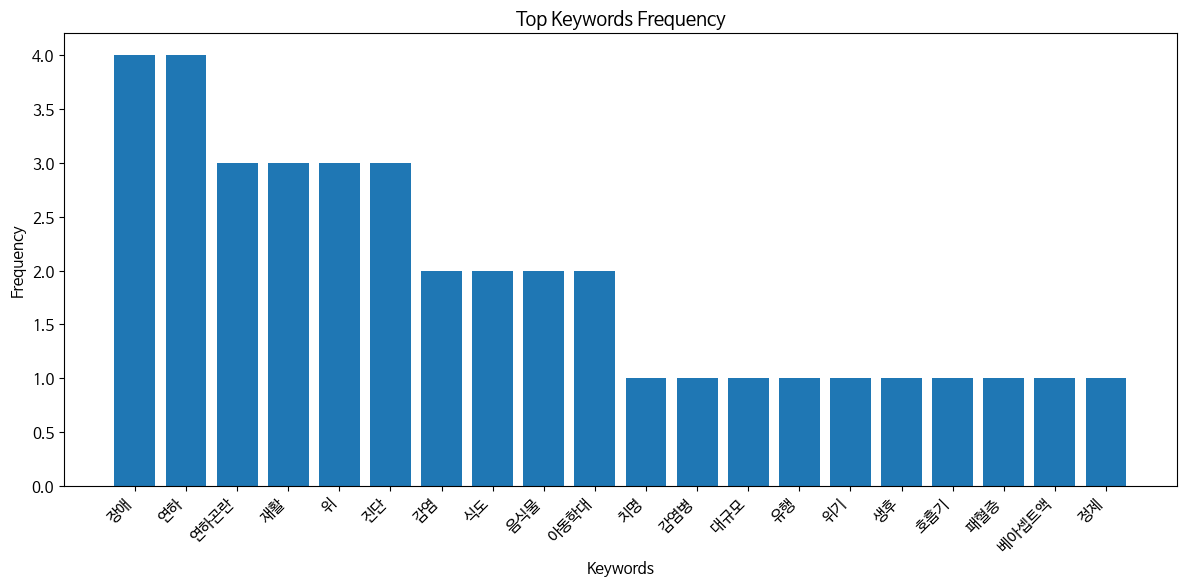

Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from bs4 import BeautifulSoup
import os
from gensim import corpora, models
from itertools import combinations
from collections import defaultdict

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하", "장애", "곤란", "문제", "빨기", "수유", "빠는", "구강",'빠는 힘']

stop_words = [
    '가', '과', '지', '합니다', '이다', '하는', '하는것', '한', '그', '이', '를', '에', '에서', '와',
    '의', '는', '들', '도', '으로', '것', '수', '있다', '되다', '들', '및', '가', '고', '적', '더', '잘',
    '게', '등을', '라는', '하다가', '하면', '하게', '까지', '로서', '에는', '뿐', '만', '없이', '처럼', '해서', '면서',
    '되어', '하기', '하면', '있어', '같은', '또한', '관련', '대한', '통해', '위해', '내', '때', '저', '요', '지금', '줄을까',
    '설마', '있을까', '인데', '멸쩡한', '어떤', '마세요', '일이', '일어나', '필요', '해야', '하던', '아직','꼴','알','편','꼭',
    '무슨', '너무', '우리', '버젓이', '빼줘야', '된다던데', '혹시', '충분한데', '가지', '딱이야', '있나', '제', '언제', '재', '탓',
    '중','등','직접','월','빨','해','갓','외','부','또','시','세','개월','가장','개','후','전','증','안','데','것','며','대부분','속',
    '거나','나','날','두','모든','보고','로','닉','실','질','날','은','여러','일','첫','달','진','감','동안','정도','즉','치','수가','계',
    '자','호'
]

remove_words = [
    '주한미군', '중국', '중국산', '사진', '기자', '무단', '배포', '영문', '연합뉴스', '뉴스', '오늘', '오전', '오후','미국',
    '한국', '일본', '세계', '사람', '대학교', '학회', '당신', '한림대', '강남', '고양이', '신학교', '축제', '남매', '해외', '차지',
    '건', '상품', '제품','최희진', '중앙대', '이대', '목동', '금쪽', '오은영', '발견', '주', '교수', '우수', '톡톡', '사흘', '눈',
    '사면', '사업', '초', '광양시','무상', '제공', '나눔', '캠페인', '전용', '에브리', '스티', '칼럼', '퀴즈', '정답', '마포구','마포'
    '유리', '돈벌', '운영','기후', '분쟁', '미숙아','아이', '신생아', '문제', '지원', '건강', '치료', '의료', '병원', '엄마', '임신',
    '경우', '모유', '수유','부부', '진행', '임산부', '출산', '때문', '빛', '비', '리콜','교실','사례','여성','환자','동산병원','임신부',
    '교육과','보건','어려움','사연','계명대','재민','순천향대','국내','미세','못','시작','탈락','물질','용품','함유','하트','더블','차마',
    '실감','기업','모습','표정','안고','처음','상대','남자친구','일부','혁신','경기','급여','산업','피의자','하나','빌라','경영','키스',
    '젤렌','스노','진보','콩고민주공화국','김천시','교육과정','시행','박희','노인','대표','원인','부품','장난감','유통','개개인','사적',
    '위험','둥이','아기','유아','이상','말','햇빛','산모','센터','판별','확대','발생','가정','미만','생활','묘','서울','은행','분만',
    '엠폭스','코로나','예랑','소아','첫걸음','성인','치과','선정','상황','어린이','법','양육','이화','간호사','행위','난임','플러스',
    '활용','소득','부담','생각','최초','팀','아빠','부모','정상','산모','출생','관리','준비','산후','약시','육아','생명','과정','원장',
    '자세','지난','사회','성공','미군','가족','모자','치아','충치','아프리카','명','대사','원','이하','여러가지','원금','구입','곳',
    '대상','패드','흡연','클리','보건소','기저귀','진의','만들기','경제','기부','기부','청소년','부위','순응','대학','주거','화증','붕괴',
    '안병원','감동','화제','공개','학교','논','시료','원샷','시기','존재','동물','수용체','외모','입양','소형','아동','인증','사고','질식',
    '기준','비즈','능력','강도','부수','판매','안전','워터','새벽','응급식','스디','형','시간','살','아침','검사','극복','추진','촉진',
    '교직원','그림','자리','번','집','품','현재','영아','매일','구성','연','김포시','이후','계속','이의','퇴원','망막','희망','음식',
    '기금','만남','저출산','절대','기존','불편','국가','맘','상태','식품','그간'
    ]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/뉴스크롤링/전처리/processed"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 한글 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if not os.path.exists(font_path):
    print("Font not found. Please check the font path.")
    font_path = None

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환 및 결측치 제거
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 저장
    all_keywords = []
    tokenized_documents = []

    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])

        # 불용어 및 제거할 단어 필터링
        tokens = [word for word in tokens if word not in stop_words and word not in remove_words]
        all_keywords.extend(tokens)
        tokenized_documents.append(tokens)

    # 키워드 분석 그래프
    print(f"Generating Keyword Analysis for {file}...")
    word_counts = Counter(all_keywords)
    most_common_keywords = word_counts.most_common(20)

    # 파일 이름만 추출
    file_name = os.path.basename(file)

    plt.figure(figsize=(12, 6))
    keywords, counts = zip(*most_common_keywords)
    plt.bar(keywords, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Keywords Frequency')
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

print("Analysis Complete.")

- 토픽 모델링

In [ ]:
!pip install pyLDAvis gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.4 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from bs4 import BeautifulSoup
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis



# 파일 경로 설정
folder_path = "/content/drive/MyDrive/뉴스크롤링/전처리/processed"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 토픽 모델링 및 결과 출력 함수
def topic_modeling_to_table(tokenized_documents, num_topics=5):
    # 사전 및 코퍼스 생성
    dictionary = corpora.Dictionary(tokenized_documents)
    corpus = [dictionary.doc2bow(text) for text in tokenized_documents]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

    # 토픽 결과 저장
    topics_data = []
    for idx, topic in lda_model.print_topics(num_words=10):
        keywords = topic.split(" + ")
        for keyword in keywords:
            weight, word = keyword.split("*")
            topics_data.append({"Topic": idx, "Keyword": word.strip('"'), "Weight": float(weight)})

    # DataFrame으로 변환
    df_topics = pd.DataFrame(topics_data)
    return df_topics

# 데이터 처리 및 실행
okt = Okt()
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 데이터 정제
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    tokenized_documents = []
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        tokens = [word for word in tokens if word not in stop_words and word not in remove_words]
        tokenized_documents.append(tokens)

    # 토픽 모델링 및 결과 출력
    print(f"\n=== Topics for {file} ===\n")
    df_topics = topic_modeling_to_table(tokenized_documents)
    print(df_topics)  # 결과를 표 형태로 출력

Processing: 중복제거_전처리된_미숙아 모유수유 문제.csv


<ipython-input-21-0e4cd8ae9bb1>:50: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())



=== Topics for 중복제거_전처리된_미숙아 모유수유 문제.csv ===

    Topic Keyword  Weight
0       0    모유수유   0.037
1       0      영양   0.024
2       0       위   0.017
3       0      면역   0.016
4       0      교육   0.013
5       0      분유   0.013
6       0      괴사   0.012
7       0      장염   0.012
8       0      증진   0.012
9       0      신체   0.010
10      1      망막   0.030
11      1    모유수유   0.028
12      1      발달   0.024
13      1     이상아   0.020
14      1     선천성   0.020
15      1      체중   0.018
16      1      안과   0.016
17      1      분유   0.016
18      1      혈관   0.014
19      1      병증   0.014
20      2    모유수유   0.017
21      2     선천성   0.014
22      2     이상아   0.012
23      2      발달   0.010
24      2      시술   0.010
25      2      영유   0.009
26      2      분유   0.008
27      2      질환   0.008
28      2     유축기   0.008
29      2      바로   0.008
30      3    모유수유   0.046
31      3     선천성   0.026
32      3      백신   0.023
33      3      접종   0.023
34      3      교육   

<ipython-input-21-0e4cd8ae9bb1>:49: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
<ipython-input-21-0e4cd8ae9bb1>:50: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())



=== Topics for 중복제거_전처리된_아기 구강 문제.csv ===

    Topic Keyword  Weight
0       0      구강   0.023
1       0       위   0.009
2       0      검진   0.009
3       0      유치   0.009
4       0    건강검진   0.005
5       0      영유   0.005
6       0      외상   0.005
7       0      질환   0.005
8       0      성장   0.004
9       0      발달   0.004
10      1      구강   0.025
11      1      맞춤   0.007
12      1      통한   0.005
13      1      마포   0.005
14      1     도우미   0.005
15      1      남녀   0.005
16      1    산후조리   0.005
17      1      등록   0.005
18      1    가정방문   0.005
19      1      질환   0.005
20      2      구강   0.029
21      2       관   0.008
22      2       입   0.007
23      2      접촉   0.007
24      2      유리   0.007
25      2      구토   0.005
26      2       혀   0.005
27      2      시술   0.005
28      2    생명공학   0.005
29      2       위   0.004
30      3      구강   0.023
31      3      재활   0.009
32      3      운동   0.006
33      3     콜라겐   0.006
34      3      다른   0.006


<ipython-input-21-0e4cd8ae9bb1>:49: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())



=== Topics for 중복제거_전처리된_아기 빠는 힘.csv ===

    Topic Keyword  Weight
0       0       젖   0.013
1       0      쪽쪽   0.009
2       0     벤틀리   0.009
3       0      자체   0.009
4       0       힘   0.009
5       0       양   0.007
6       0      기도   0.007
7       0    세리머니   0.007
8       0     전문의   0.007
9       0       물   0.007
10      1       힘   0.031
11      1       젖   0.023
12      1      유방   0.020
13      1      젖병   0.015
14      1      양쪽   0.013
15      1      일반   0.011
16      1      한쪽   0.011
17      1    모유수유   0.010
18      1      요령   0.010
19      1      속도   0.010
20      2   구순구개열   0.032
21      2      젖병   0.032
22      2   유한킴벌리   0.023
23      2       힘   0.023
24      2       젖   0.015
25      2       위   0.009
26      2      기능   0.009
27      2      빨대   0.007
28      2     담당자   0.007
29      2      기적   0.006
30      3     지지도   0.020
31      3      연습   0.018
32      3      혼자   0.018
33      3     주치의   0.018
34      3       숨   0.016
35